In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_classification_functions
import custom_models
from custom_classification_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = False

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_classification_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_random_fp/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_classification_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_scaffold_fp/model_gnn_conv"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001
batch_size = 1024

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [10]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [11]:
print(len(combinations))

72


run: 0
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E3D5DF0>, <torch.utils.data.dataset.Subset object at 0x00000222B0DE52B0>, <torch.utils.data.dataset.Subset object at 0x00000222B0DE57F0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  769


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 0.39317764206366107 | Validation Loss 0.1694292366504669 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15485408969900824 | Validation Loss 0.13018718883395194 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15351918384884344 | Validation Loss 0.20406675040721894 | Validation accuracy 0.9500434027777779
Epoch 30 | Train Loss 0.15143192446593082 | Validation Loss 0.12795294299721718 | Validation accuracy 0.971875
Epoch 40 | Train Loss 0.15164332791711344 | Validation Loss 0.16320968866348268 | Validation accuracy 0.9609592013888889
Epoch 50 | Train Loss 0.14925898972785834 | Validation Loss 0.12669441401958464 | Validation accuracy 0.971875
Epoch 60 | Train Loss 0.14577347525593007 | Validation Loss 0.12444148808717728 | Validation accuracy 0.971875
Epoch 70 | Train Loss 0.14744512736797333 | Validation Loss 0.15032953321933745 | Validation accuracy 0.9609592013888889
Epoch 80 | Train Loss 0.1461463843782743 | Validation Loss 0.1221537578850

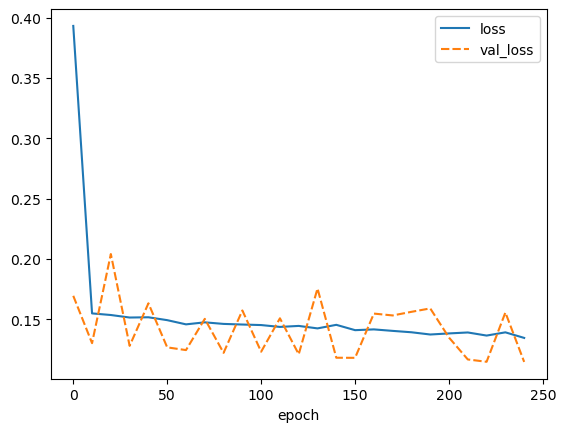

best weights loaded


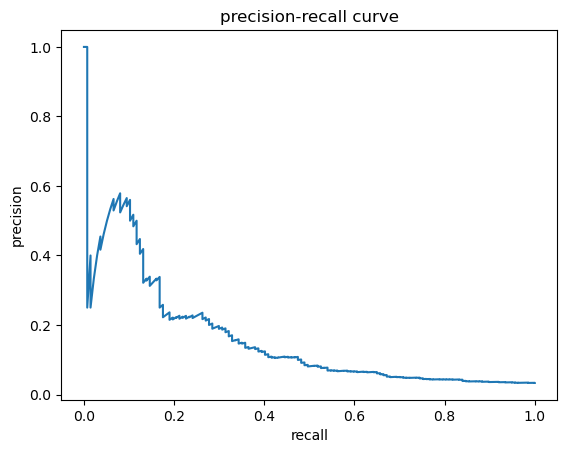

elapsed time: 643.7467772960663
run: 73
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E406C40>, <torch.utils.data.dataset.Subset object at 0x0000022388AF1040>, <torch.utils.data.dataset.Subset object at 0x0000022388AF1340>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.2360993018656066 | Validation Loss 0.16890520006418228 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15201654014262286 | Validation Loss 0.12948798164725303 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15084707149953552 | Validation Loss 0.168166971206

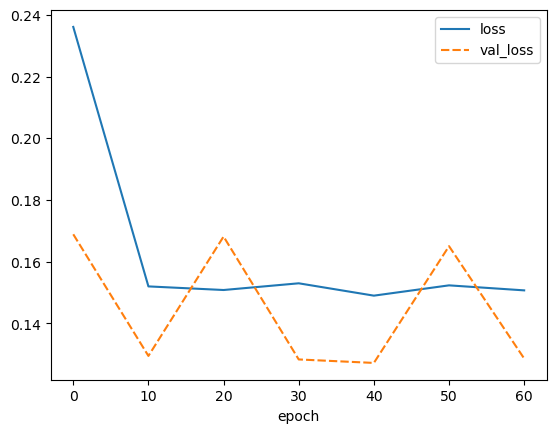

best weights loaded


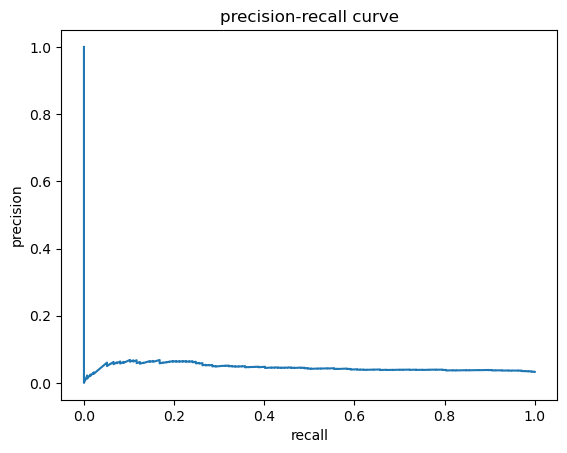

elapsed time: 173.72459769248962
run: 74
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E406A60>, <torch.utils.data.dataset.Subset object at 0x00000222B0DFE1F0>, <torch.utils.data.dataset.Subset object at 0x00000222B0DFE2B0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.18655996656779086 | Validation Loss 0.18426936864852905 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1544799335075147 | Validation Loss 0.1276838406920433 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14936023499026443 | Validation Loss 0.1245218165218

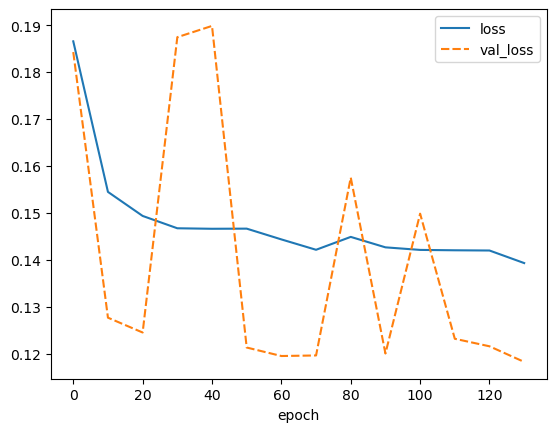

best weights loaded


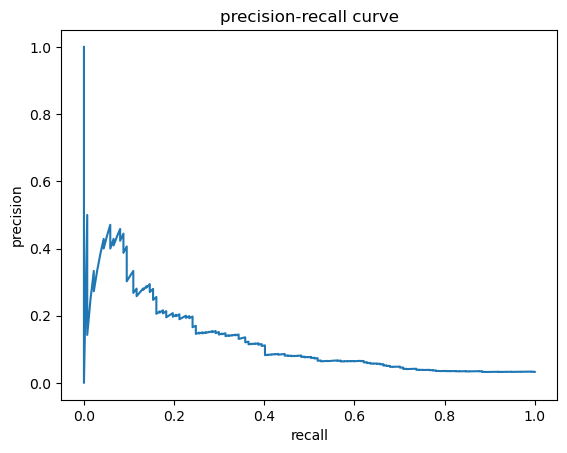

elapsed time: 363.9498972892761
run: 75
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E590AF0>, <torch.utils.data.dataset.Subset object at 0x0000022372CDF070>, <torch.utils.data.dataset.Subset object at 0x0000022372CDF5B0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4929
Epoch 0 | Train Loss 0.20466911612134991 | Validation Loss 0.17762261629104614 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1491228233684193 | Validation Loss 0.168391415476799 | Validation accuracy 0.960959

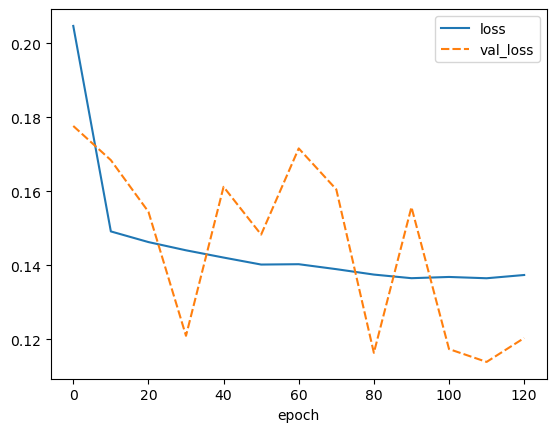

best weights loaded


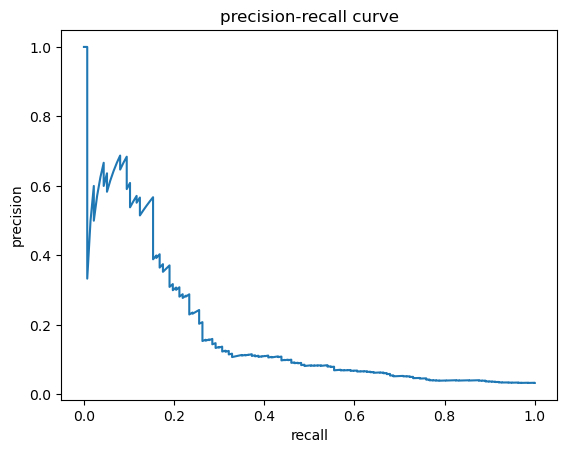

elapsed time: 403.0812990665436
run: 76
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228F8219D0>, <torch.utils.data.dataset.Subset object at 0x0000022388AD3280>, <torch.utils.data.dataset.Subset object at 0x0000022388AF1610>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.2748818652647914 | Validation Loss 0.20850028991699218 | Validation accuracy 0.9500434027777779
Epoch 10 | Train Loss 0.15388574157700394 | Validation Loss 0.1291201777756214 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15252037436673135 | Valid

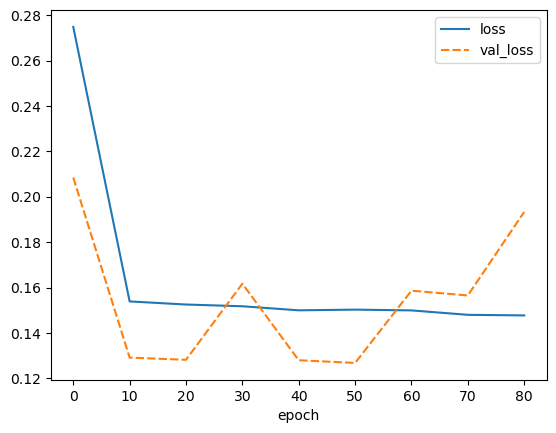

best weights loaded


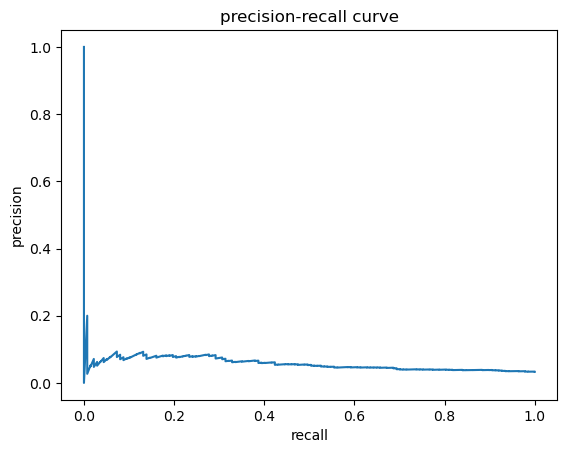

elapsed time: 263.2962176799774
run: 77
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E828640>, <torch.utils.data.dataset.Subset object at 0x000002236E664370>, <torch.utils.data.dataset.Subset object at 0x000002236E664880>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.22738727430502573 | Validation Loss 0.1386405151337385 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15067098492925818 | Validation Loss 0.12595999762415885 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.1473600191600395 | Validation Loss 

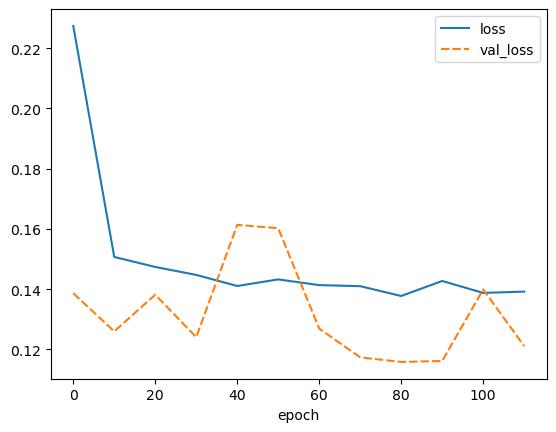

best weights loaded


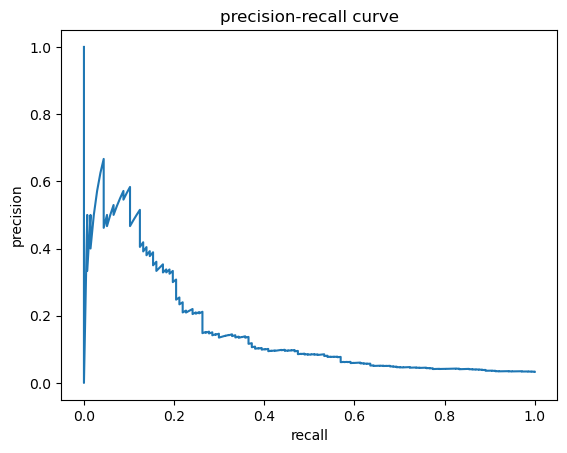

elapsed time: 366.04941487312317
run: 78
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228F840730>, <torch.utils.data.dataset.Subset object at 0x00000222B0EDBD60>, <torch.utils.data.dataset.Subset object at 0x00000222B0EDBCD0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9089
Epoch 0 | Train Loss 0.33384060769370105 | Validation Loss 0.1439870186150074 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15138412018616995 | Validation Loss 0.12751163616776467 | Validation accuracy 0.971875


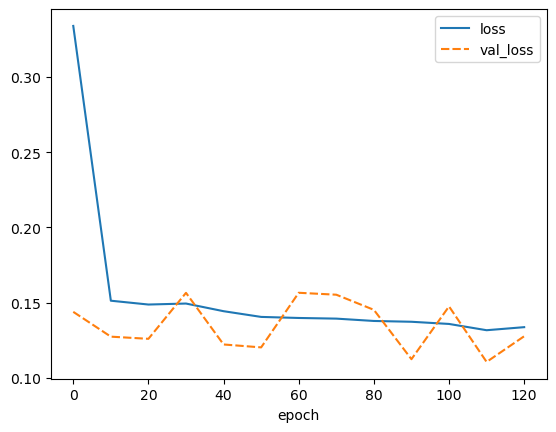

best weights loaded


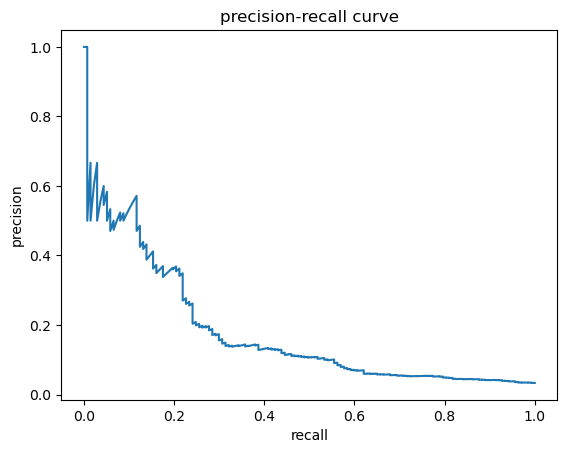

elapsed time: 387.8970859050751
run: 79
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E536430>, <torch.utils.data.dataset.Subset object at 0x0000022388B4EA30>, <torch.utils.data.dataset.Subset object at 0x0000022388B4EDF0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.27669359811327676 | Validation Loss 0.1338048242032528 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15231161970983853 | Validation Loss 0.12977947443723678 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.1511026042880434 | Validatio

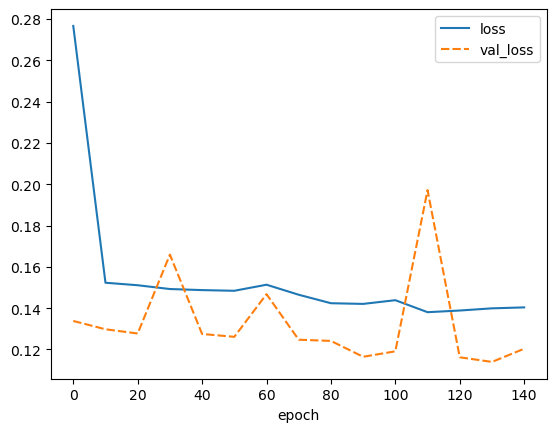

best weights loaded


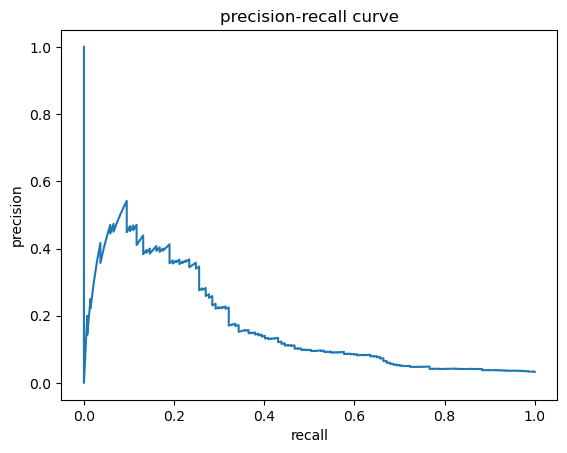

elapsed time: 432.0639154911041
run: 80
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228FCB2D00>, <torch.utils.data.dataset.Subset object at 0x00000223889BCA90>, <torch.utils.data.dataset.Subset object at 0x00000223889BC550>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.31596013181137317 | Validation Loss 0.13698162324726582 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1478182996312777 | Validation Loss 0.15866973698139192 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.14561417947212854 |

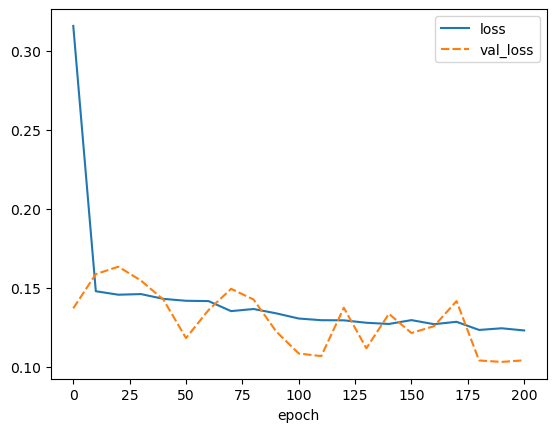

best weights loaded


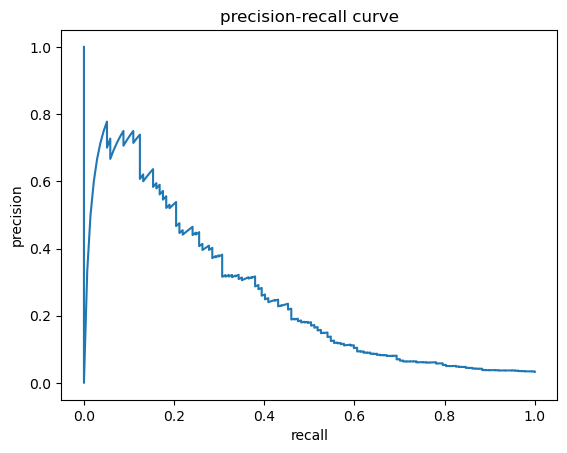

elapsed time: 639.4070129394531
run: 81
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228FB11A90>, <torch.utils.data.dataset.Subset object at 0x00000222B0E876D0>, <torch.utils.data.dataset.Subset object at 0x00000222B0E879A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13249
Epoch 0 | Train Loss 0.19363696331327612 | Validation Loss 0.17249277830123902 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15019720160599911 | Validation Loss 0.15335908234119416 | Validation accurac

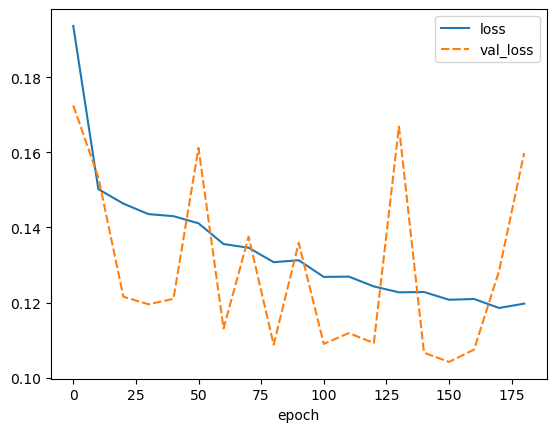

best weights loaded


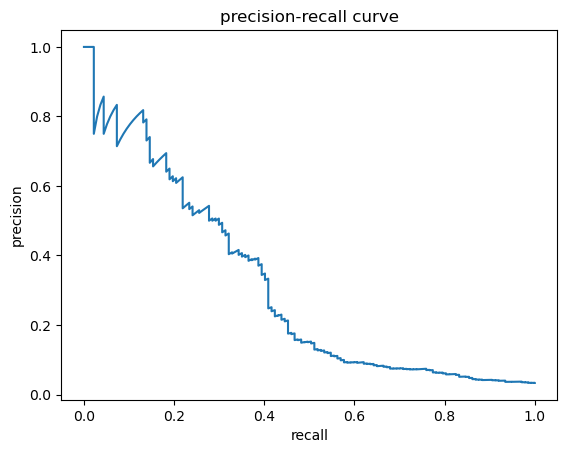

elapsed time: 588.6581029891968
run: 82
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228F9D8F40>, <torch.utils.data.dataset.Subset object at 0x0000022388A59280>, <torch.utils.data.dataset.Subset object at 0x00000222B0E87640>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.2809274851372748 | Validation Loss 0.13483652845025063 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15114954791285776 | Validation Loss 0.12656417973339557 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15096373675447522 | Validat

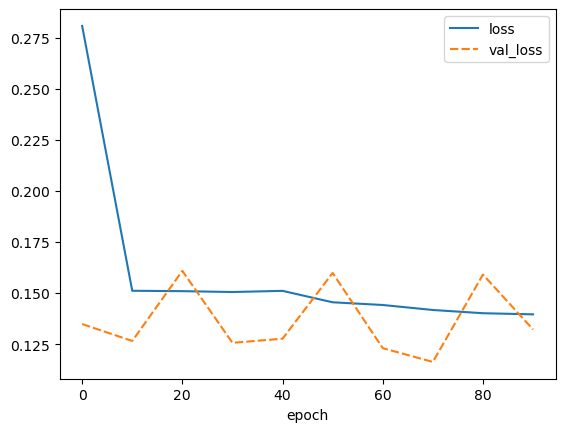

best weights loaded


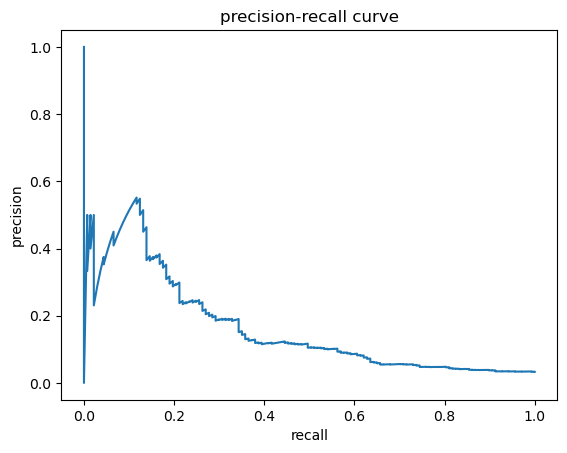

elapsed time: 293.274662733078
run: 83
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228FEF6100>, <torch.utils.data.dataset.Subset object at 0x0000022388B8EC40>, <torch.utils.data.dataset.Subset object at 0x0000022388B94190>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.2571134770458395 | Validation Loss 0.1349723871797323 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15036521626241278 | Validation Loss 0.12861678302288054 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14740080138047537 | Validation

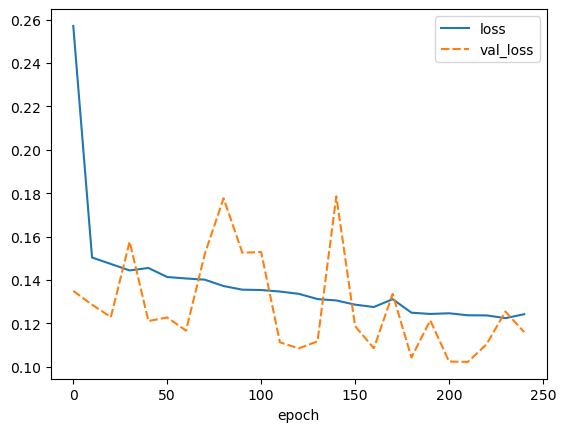

best weights loaded


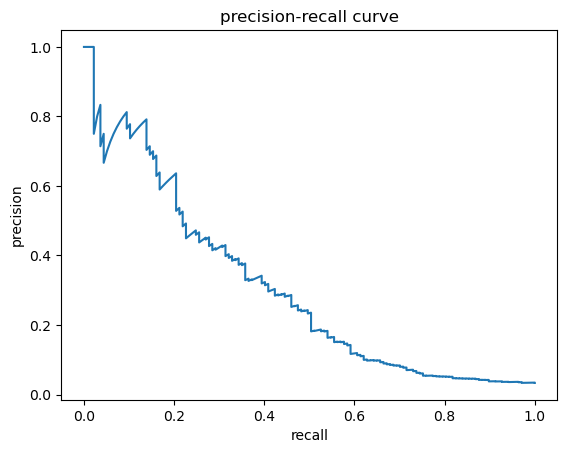

elapsed time: 753.0028314590454
run: 84
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222900403D0>, <torch.utils.data.dataset.Subset object at 0x0000022388B8E2B0>, <torch.utils.data.dataset.Subset object at 0x0000022388B8EBB0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  769
Epoch 0 | Train Loss 0.16558349860662763 | Validation Loss 0.17118840515613556 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15360012131206918 | Validation Loss 0.16318383812904358 | Validation accuracy 0.9609592013888889
Epoch 20 

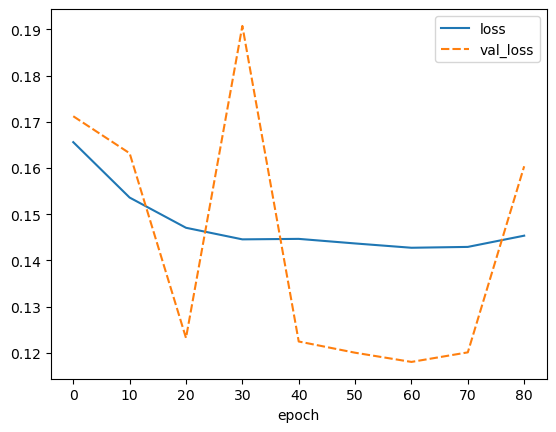

best weights loaded


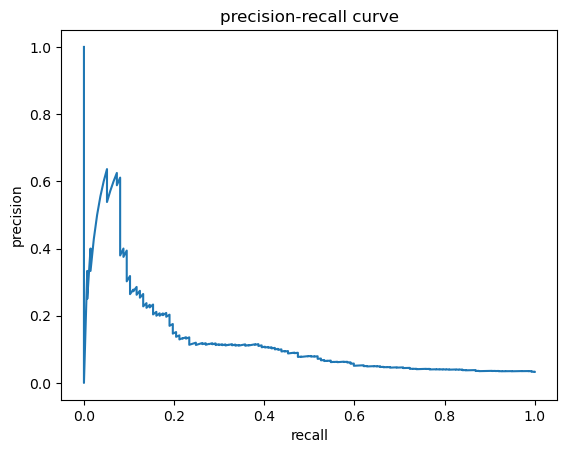

elapsed time: 234.76838994026184
run: 85
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222E4BD5FA0>, <torch.utils.data.dataset.Subset object at 0x000002228FEF6670>, <torch.utils.data.dataset.Subset object at 0x000002228FEF6AC0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.2843266711993651 | Validation Loss 0.14802722185850142 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15075543567989813 | Validation Loss 0.12910405173897743 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15063269052541617 | Validation Loss 0.16901635527610778 

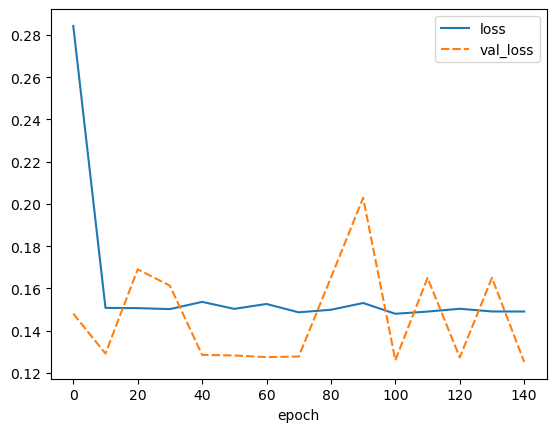

best weights loaded


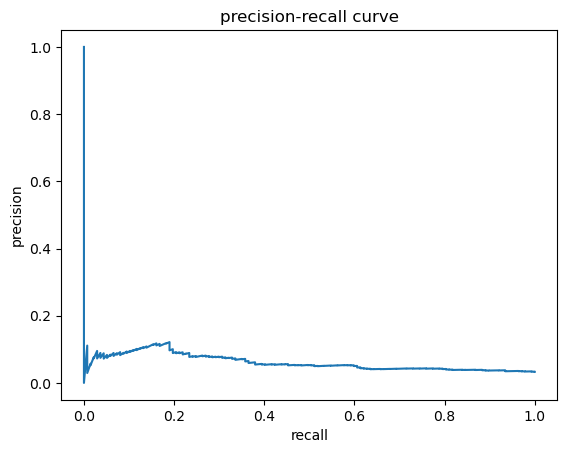

elapsed time: 386.9606022834778
run: 86
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229023CD30>, <torch.utils.data.dataset.Subset object at 0x00000222E40B50D0>, <torch.utils.data.dataset.Subset object at 0x00000222E40B56D0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.3732630217617208 | Validation Loss 0.16131336987018585 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1554954442562479 | Validation Loss 0.16831703186035157 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.15154007302992273 | Validation Loss 0.16546203047

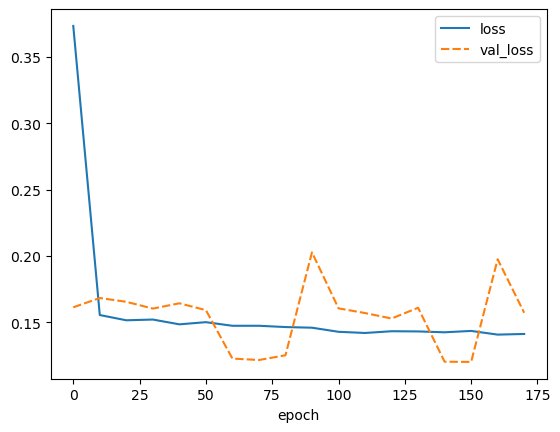

best weights loaded


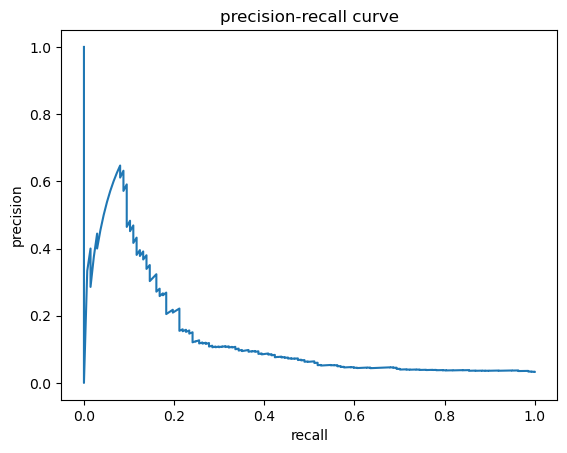

elapsed time: 496.44273591041565
run: 87
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222903E94F0>, <torch.utils.data.dataset.Subset object at 0x0000022388BD2A60>, <torch.utils.data.dataset.Subset object at 0x0000022388BD29D0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4929
Epoch 0 | Train Loss 0.324624139251131 | Validation Loss 0.13591509349644185 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15026429205229788 | Validation Loss 0.16365193128585814 | Validation accuracy 0.96095920138

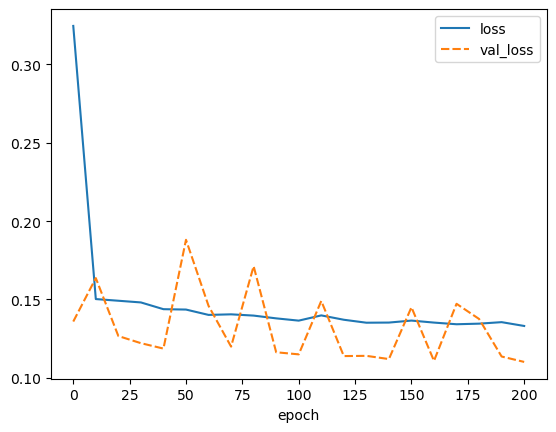

best weights loaded


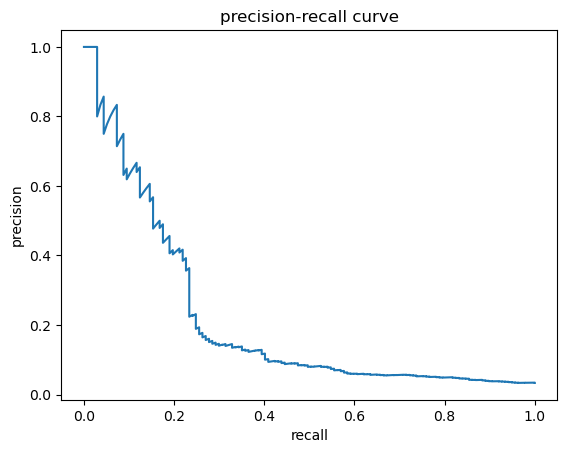

elapsed time: 693.1879086494446
run: 88
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229160C490>, <torch.utils.data.dataset.Subset object at 0x000002228FEF6400>, <torch.utils.data.dataset.Subset object at 0x000002236E659FD0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.2989344068548896 | Validation Loss 0.1295681282877922 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15335081608006448 | Validation Loss 0.12831497117877005 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15201601521535354 | Validation L

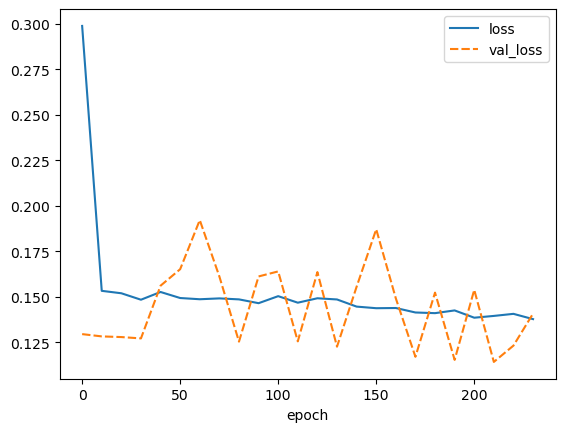

best weights loaded


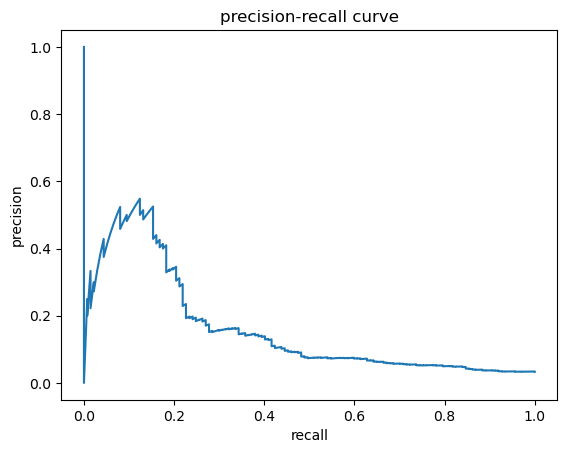

elapsed time: 744.2775630950928
run: 89
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022290478160>, <torch.utils.data.dataset.Subset object at 0x000002237EE6A070>, <torch.utils.data.dataset.Subset object at 0x000002237EE6A580>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.458287567803354 | Validation Loss 0.1766220360994339 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.14941407491763434 | Validation Loss 0.12730735391378403 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15180869535966354 | Vali

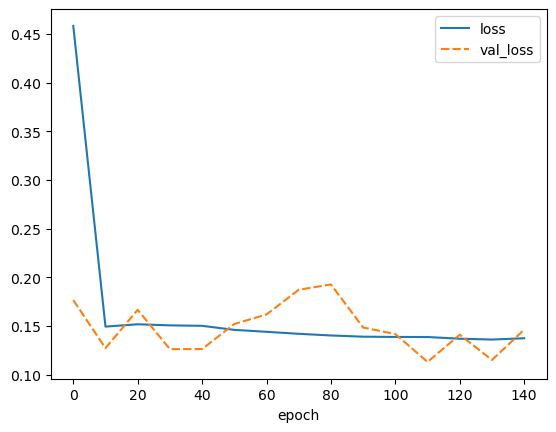

best weights loaded


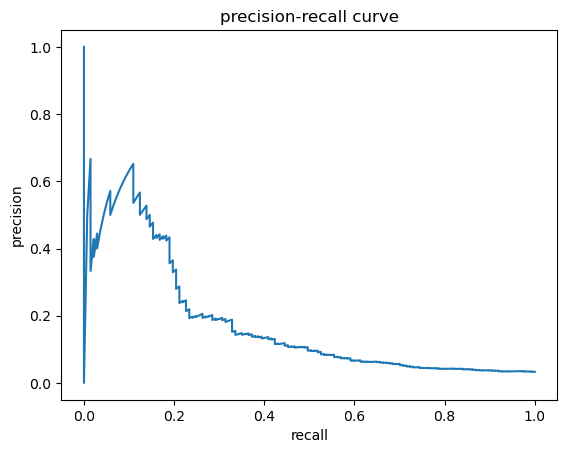

elapsed time: 504.67136883735657
run: 90
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228DEBD5E0>, <torch.utils.data.dataset.Subset object at 0x000002237EE6A130>, <torch.utils.data.dataset.Subset object at 0x000002237EE6A3A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9089
Epoch 0 | Train Loss 0.20090429304224072 | Validation Loss 0.17131441831588745 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.14721704161528384 | Validation Loss 0.16506634056568145 | Validation accu

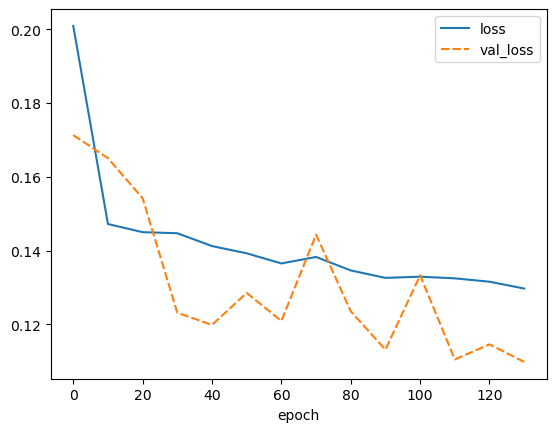

best weights loaded


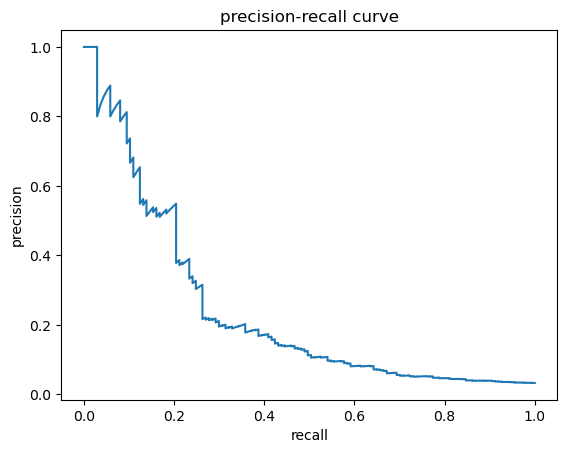

elapsed time: 384.3593645095825
run: 91
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291679790>, <torch.utils.data.dataset.Subset object at 0x0000022389C464C0>, <torch.utils.data.dataset.Subset object at 0x0000022389C469D0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.2443901855837215 | Validation Loss 0.13502108100801707 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1520809650872693 | Validation Loss 0.12741138115525247 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.149929747662761 | Validati

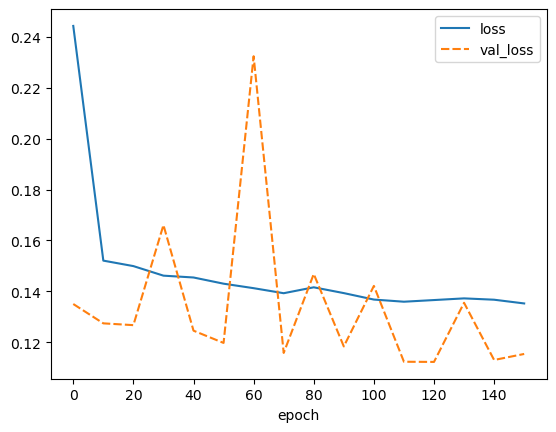

best weights loaded


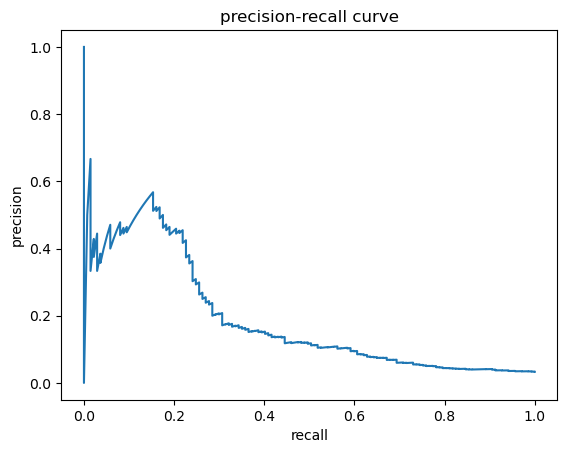

elapsed time: 427.10829615592957
run: 92
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222901306D0>, <torch.utils.data.dataset.Subset object at 0x0000022388A59FD0>, <torch.utils.data.dataset.Subset object at 0x0000022389C1E880>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.2637103633447127 | Validation Loss 0.13818810880184174 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14752720002875183 | Validation Loss 0.156056746840477 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.14878274364904923

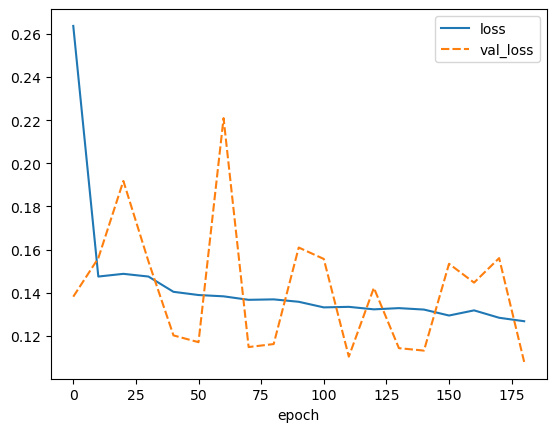

best weights loaded


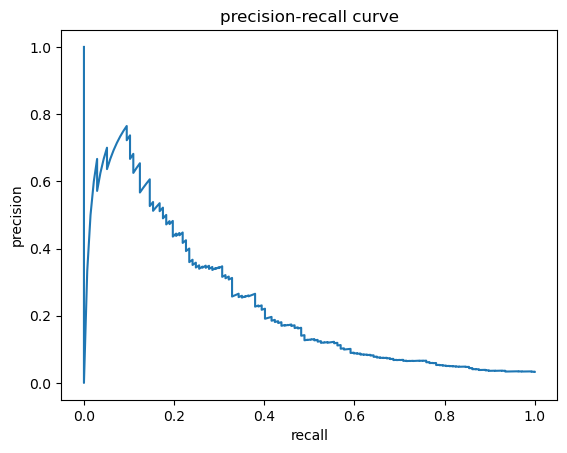

elapsed time: 538.5256712436676
run: 93
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291B5F3D0>, <torch.utils.data.dataset.Subset object at 0x0000022372C5D6A0>, <torch.utils.data.dataset.Subset object at 0x0000022372C5D3A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13249
Epoch 0 | Train Loss 0.32029534153866046 | Validation Loss 0.14154094718396665 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14778512987223538 | Validation Loss 0.12434705942869187 | Validation accuracy 0.971

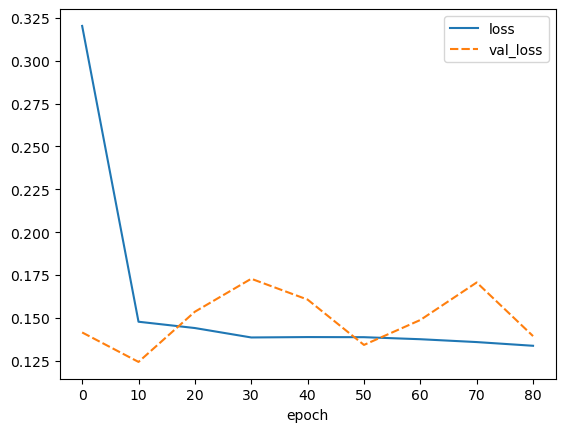

best weights loaded


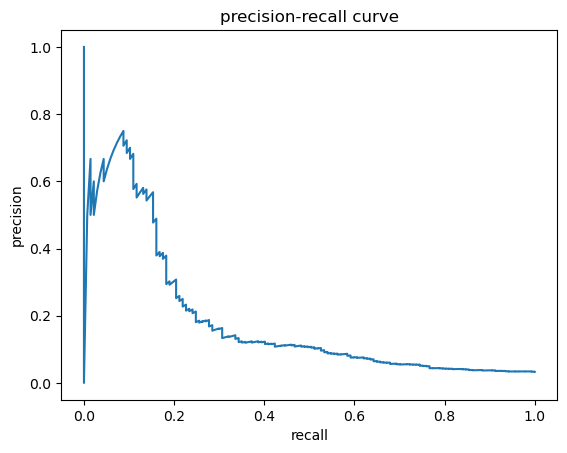

elapsed time: 272.39298462867737
run: 94
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291AE2160>, <torch.utils.data.dataset.Subset object at 0x0000022372C61C70>, <torch.utils.data.dataset.Subset object at 0x0000022372C61EE0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.2382819191976027 | Validation Loss 0.13015890568494798 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15242787089311716 | Validation Loss 0.16513370871543884 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.1501045694405

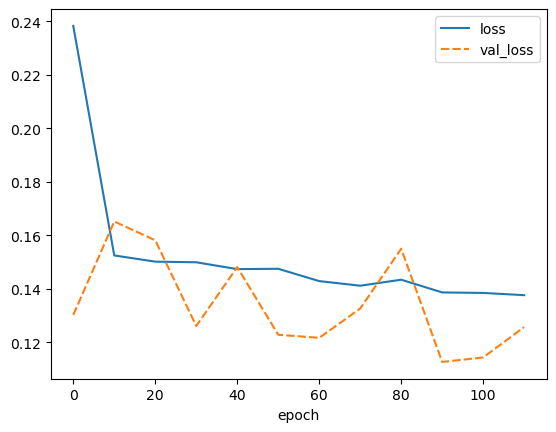

best weights loaded


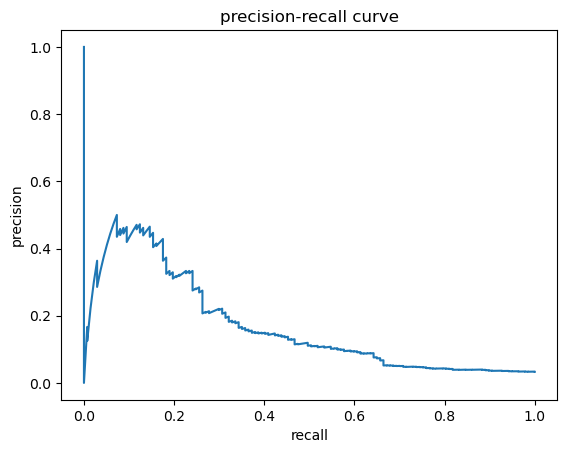

elapsed time: 347.318904876709
run: 95
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291F9FC70>, <torch.utils.data.dataset.Subset object at 0x000002229025F190>, <torch.utils.data.dataset.Subset object at 0x000002237EE71550>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.21777808485609113 | Validation Loss 0.13273120075464248 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14804644385973612 | Validation Loss 0.12475515529513359 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14554578133604743 | Valid

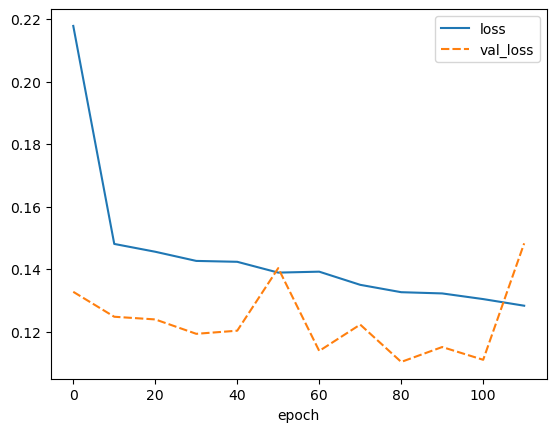

best weights loaded


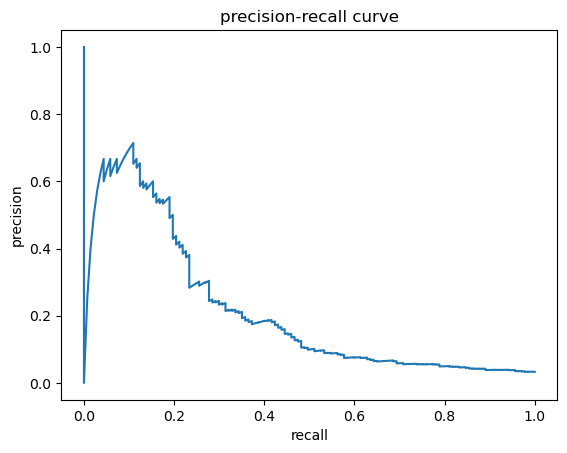

elapsed time: 347.00140595436096
run: 96
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222932EC100>, <torch.utils.data.dataset.Subset object at 0x0000022388B05D60>, <torch.utils.data.dataset.Subset object at 0x0000022388B05E80>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  3073
Epoch 0 | Train Loss 0.26468429511243646 | Validation Loss 0.1383011545985937 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14988732495994278 | Validation Loss 0.12738546207547188 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14768

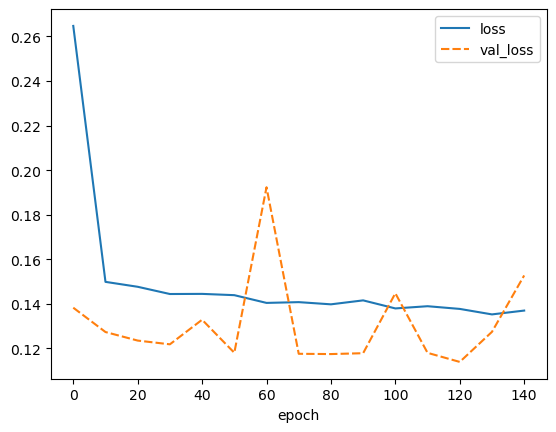

best weights loaded


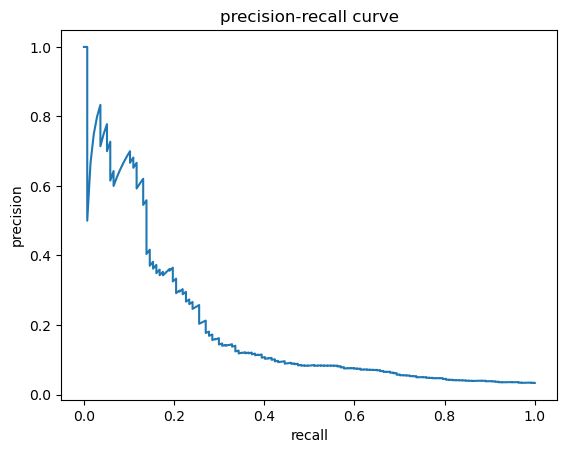

elapsed time: 475.4183268547058
run: 97
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022287BEE700>, <torch.utils.data.dataset.Subset object at 0x0000022372C61A30>, <torch.utils.data.dataset.Subset object at 0x0000022372C61EB0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.2914672995155508 | Validation Loss 0.20941991209983826 | Validation accuracy 0.9500434027777779
Epoch 10 | Train Loss 0.15464977649125186 | Validation Loss 0.1295316994190216 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15037699833963858 | Validation Loss 0.127818403

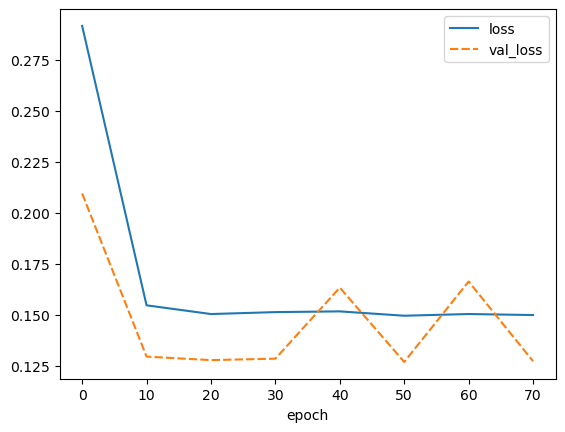

best weights loaded


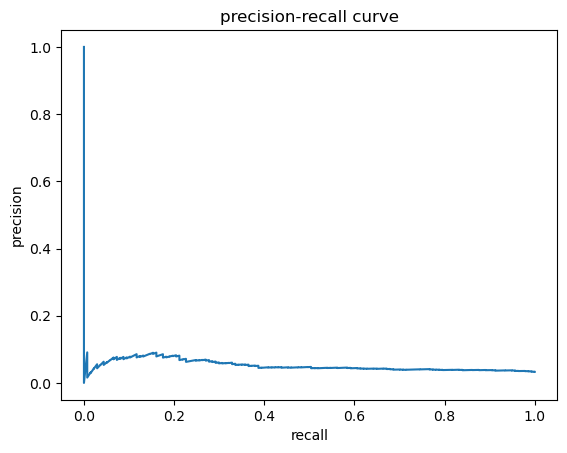

elapsed time: 220.46219301223755
run: 98
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228DE4C880>, <torch.utils.data.dataset.Subset object at 0x0000022291B5F460>, <torch.utils.data.dataset.Subset object at 0x00000222919D8730>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.2210946593320731 | Validation Loss 0.17769437432289123 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15217640815359174 | Validation Loss 0.1626412183046341 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.14850379165374872 | Validation Loss 0

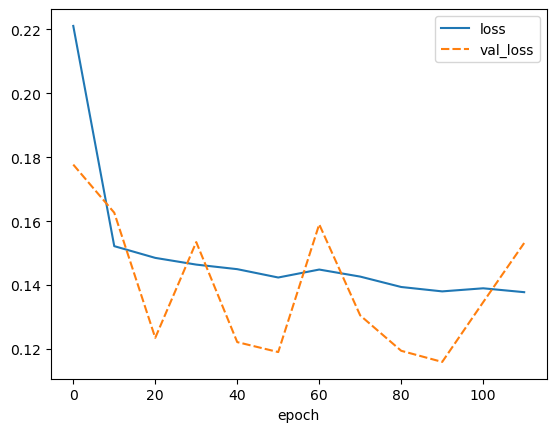

best weights loaded


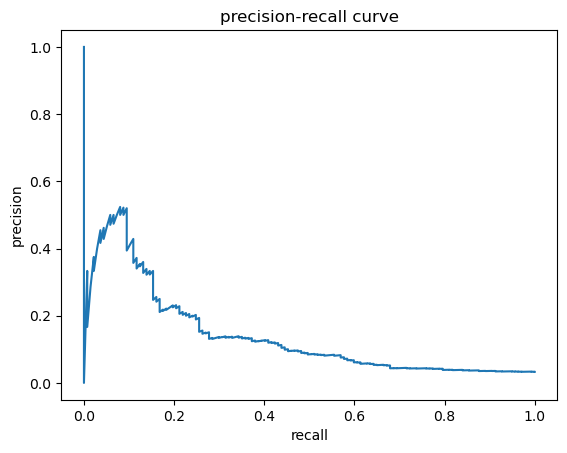

elapsed time: 362.52395582199097
run: 99
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222933420A0>, <torch.utils.data.dataset.Subset object at 0x000002229025FE20>, <torch.utils.data.dataset.Subset object at 0x000002229025F940>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68865
Epoch 0 | Train Loss 0.19043104350566864 | Validation Loss 0.2004808485507965 | Validation accuracy 0.9500434027777779
Epoch 10 | Train Loss 0.15142308062676227 | Validation Loss 0.1544270396232605 | Validation accuracy 0

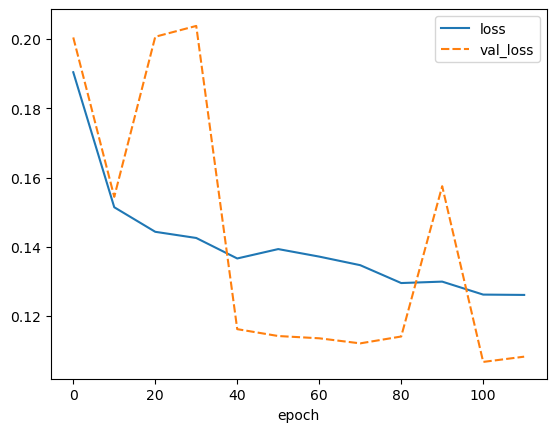

best weights loaded


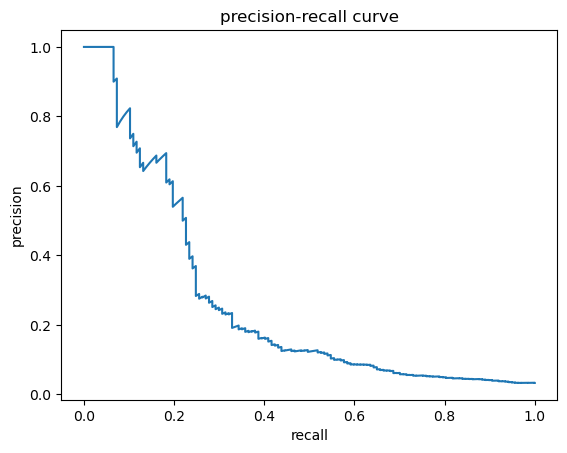

elapsed time: 320.5528452396393
run: 100
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228FD91B50>, <torch.utils.data.dataset.Subset object at 0x000002237EE86040>, <torch.utils.data.dataset.Subset object at 0x000002237EE86370>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.21022025834430347 | Validation Loss 0.1312741830945015 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15164813737977634 | Validation Loss 0.16343006789684295 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.150727306125742 |

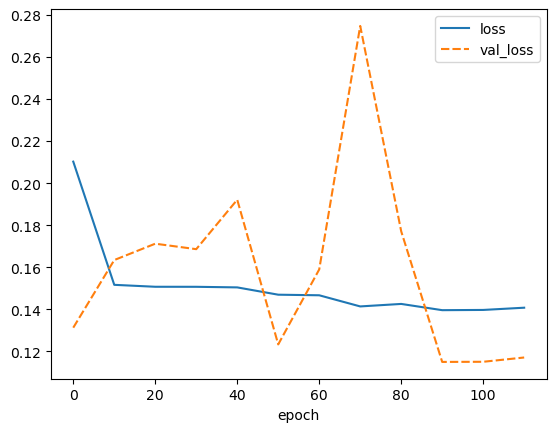

best weights loaded


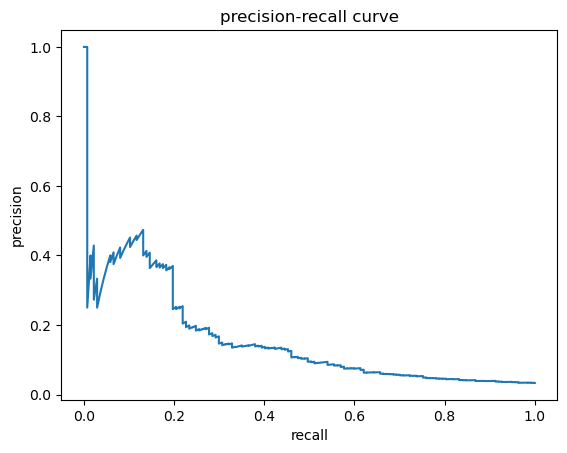

elapsed time: 293.92992186546326
run: 101
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E3F8100>, <torch.utils.data.dataset.Subset object at 0x0000022293231BE0>, <torch.utils.data.dataset.Subset object at 0x000002237EE86280>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.2120987337195512 | Validation Loss 0.13920442163944244 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1508298290498329 | Validation Loss 0.15728543400764466 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.14525349528500528 

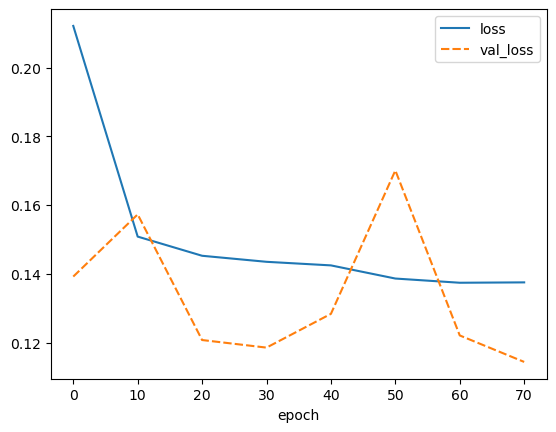

best weights loaded


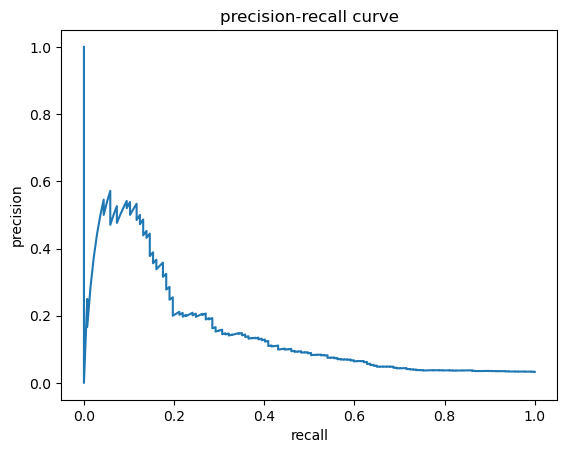

elapsed time: 198.48868107795715
run: 102
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222D4496D00>, <torch.utils.data.dataset.Subset object at 0x00000222E5BA6190>, <torch.utils.data.dataset.Subset object at 0x00000222E5BA6490>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134657
Epoch 0 | Train Loss 0.2056307110822562 | Validation Loss 0.16971128880977632 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1464063787099087 | Validation Loss 0.13632909953594208 | Validation ac

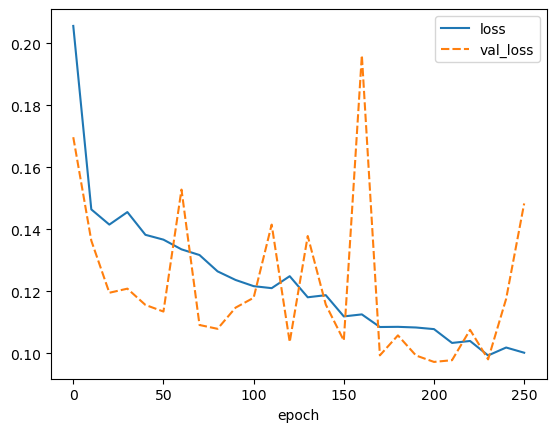

best weights loaded


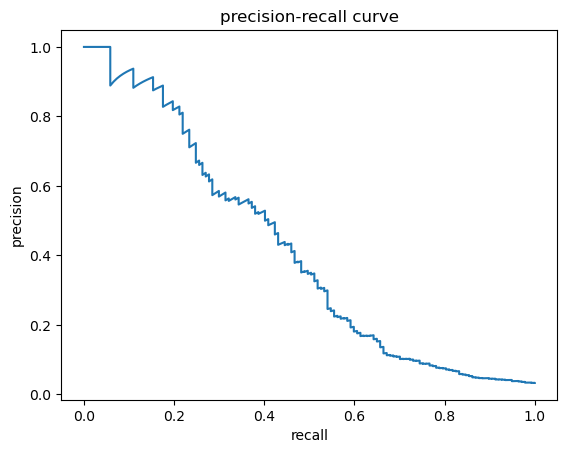

elapsed time: 764.4609799385071
run: 103
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022287BEE700>, <torch.utils.data.dataset.Subset object at 0x0000022293348D90>, <torch.utils.data.dataset.Subset object at 0x00000222933489A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.20421478242585153 | Validation Loss 0.16535471975803376 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1499937576326457 | Validation Loss 0.1282588578760624 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14999936882

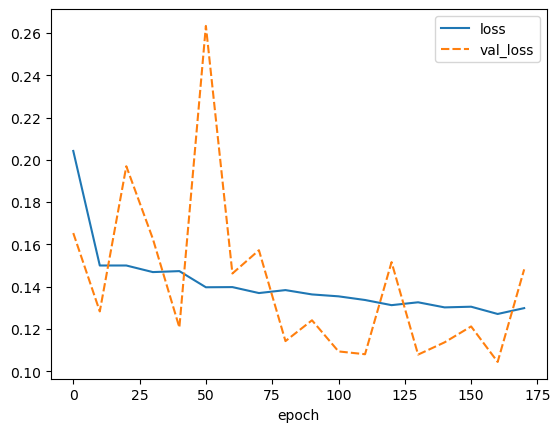

best weights loaded


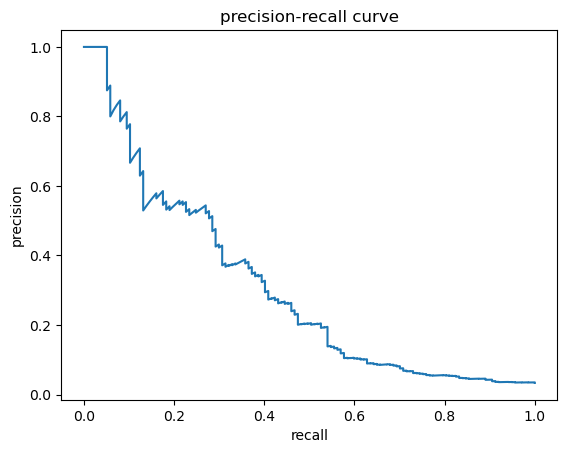

elapsed time: 488.61976528167725
run: 104
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229392E9D0>, <torch.utils.data.dataset.Subset object at 0x0000022388A4D2E0>, <torch.utils.data.dataset.Subset object at 0x0000022388A4D130>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.20695899878487442 | Validation Loss 0.17257113456726075 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.14708836963682465 | Validation Loss 0.12032921053469181 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.145000362

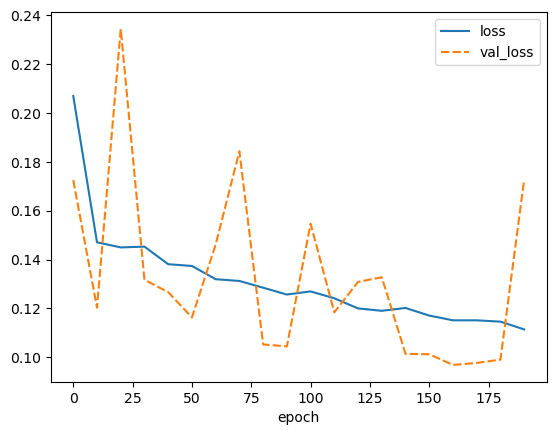

best weights loaded


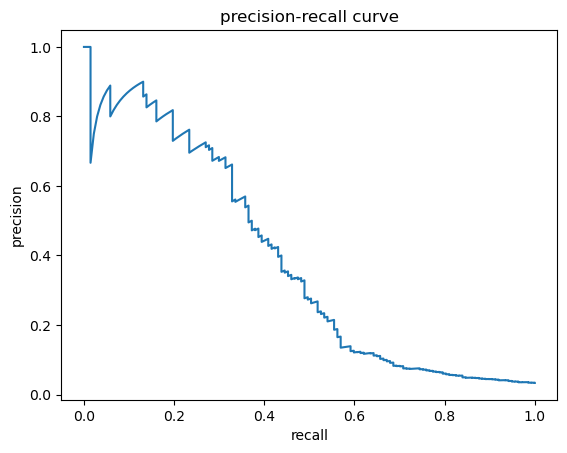

elapsed time: 567.9805836677551
run: 105
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222938741C0>, <torch.utils.data.dataset.Subset object at 0x00000223901F0A00>, <torch.utils.data.dataset.Subset object at 0x00000223901F0F10>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200449
Epoch 0 | Train Loss 0.1990978659102411 | Validation Loss 0.1333966337144375 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1467967570731134 | Validation Loss 0.1982451170682907 | Validation accuracy 0.9500

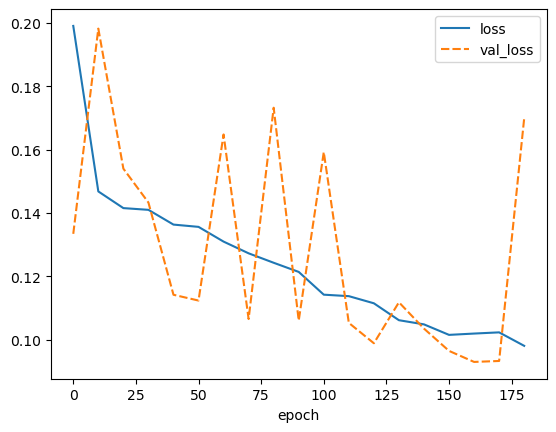

best weights loaded


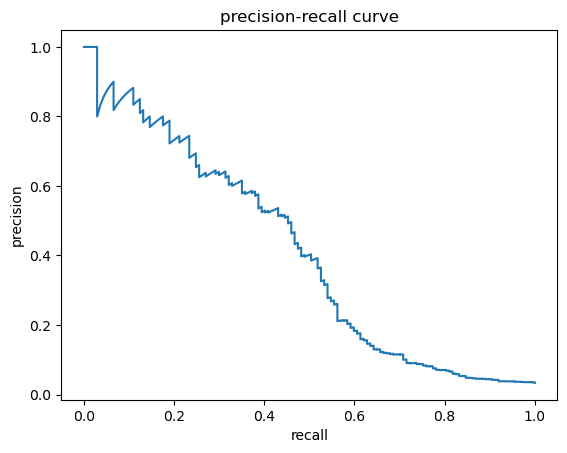

elapsed time: 602.2644362449646
run: 106
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291655D60>, <torch.utils.data.dataset.Subset object at 0x00000223901F66D0>, <torch.utils.data.dataset.Subset object at 0x00000223901F6DF0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.19355017940203348 | Validation Loss 0.1740056484937668 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15141821720383383 | Validation Loss 0.12803219854831696 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.1575233967

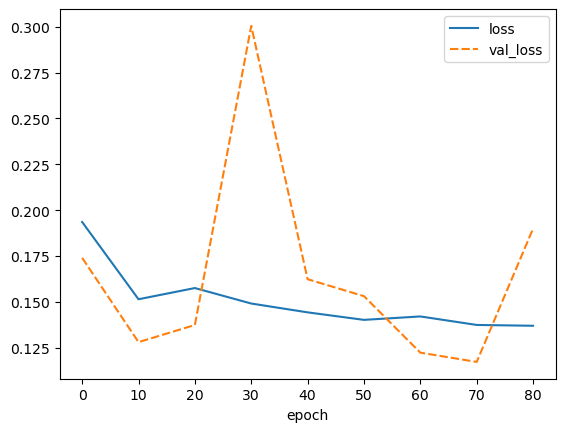

best weights loaded


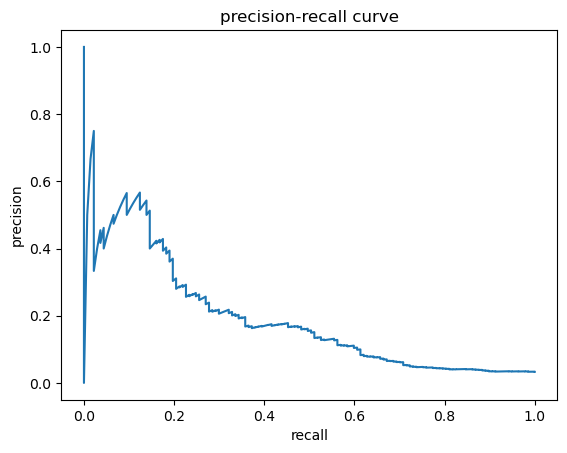

elapsed time: 273.57636618614197
run: 107
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229188A8E0>, <torch.utils.data.dataset.Subset object at 0x00000222B0E3C9A0>, <torch.utils.data.dataset.Subset object at 0x00000222B0E46370>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.20996425504034216 | Validation Loss 0.16977429687976836 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1470928435975855 | Validation Loss 0.12205208092927933 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.1463158640

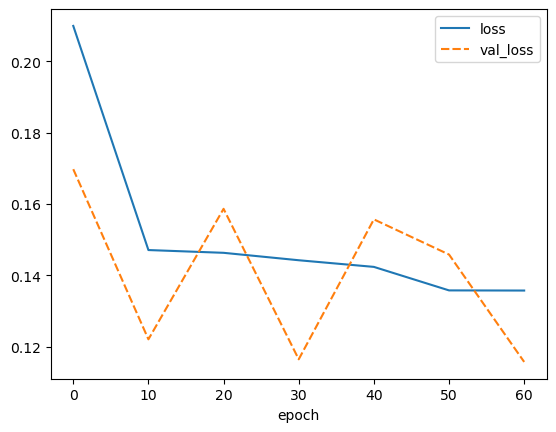

best weights loaded


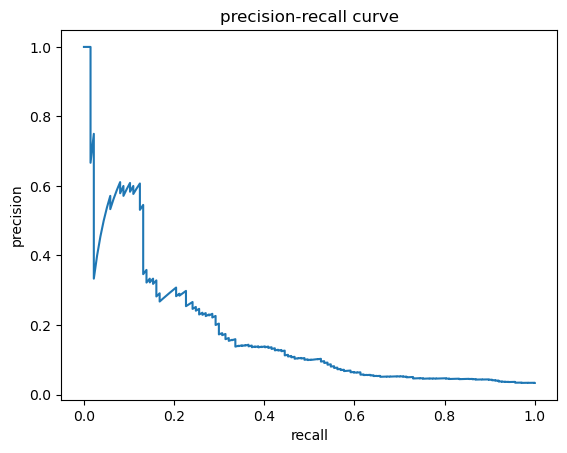

elapsed time: 218.8226158618927
run: 108
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022294EF2370>, <torch.utils.data.dataset.Subset object at 0x0000022376E30430>, <torch.utils.data.dataset.Subset object at 0x00000222B0E2E490>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  3073
Epoch 0 | Train Loss 0.22504582459276373 | Validation Loss 0.20694982409477233 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15005354538108362 | Validation Loss 0.12657511308789254 | Validation accuracy 0.971875
Epoch 20 | Trai

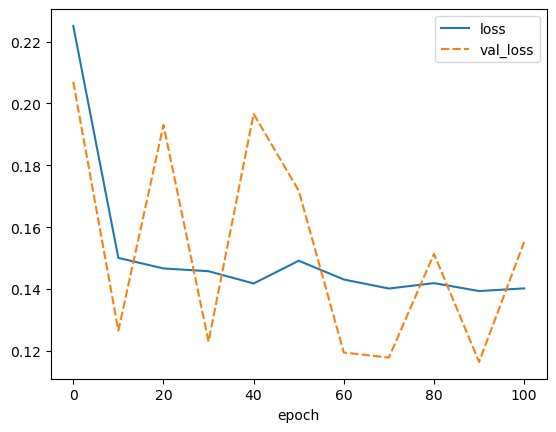

best weights loaded


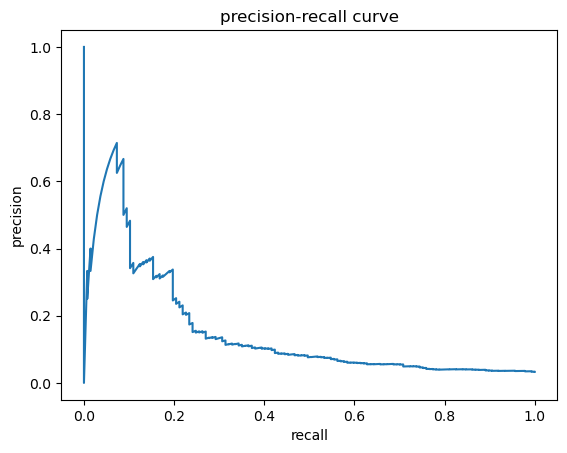

elapsed time: 356.10603761672974
run: 109
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291D698E0>, <torch.utils.data.dataset.Subset object at 0x0000022295042520>, <torch.utils.data.dataset.Subset object at 0x00000222950425E0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.2879481189178698 | Validation Loss 0.129535910859704 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15075657765070596 | Validation Loss 0.1978354960680008 | Validation accuracy 0.9500434027777779
Epoch 20 | Train Loss 0.15085269555901037 | Validation Loss 0.161458

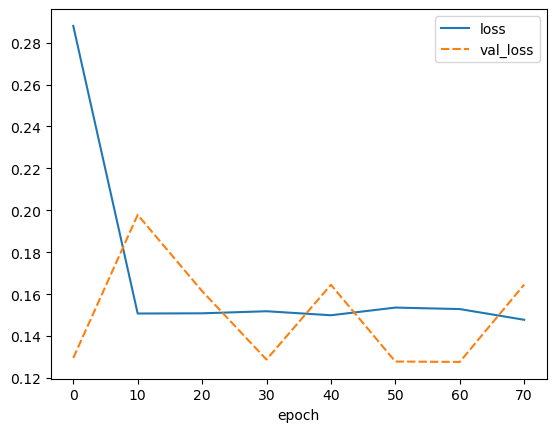

best weights loaded


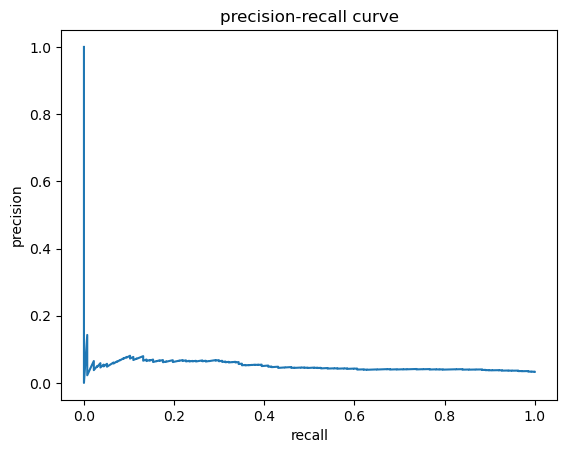

elapsed time: 238.43662190437317
run: 110
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222952669D0>, <torch.utils.data.dataset.Subset object at 0x00000223901F63A0>, <torch.utils.data.dataset.Subset object at 0x00000223901F68B0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.22371522404930808 | Validation Loss 0.18414663076400756 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.155299023019545 | Validation Loss 0.12671466991305352 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14866408547668747 | Validation Loss 0.16277

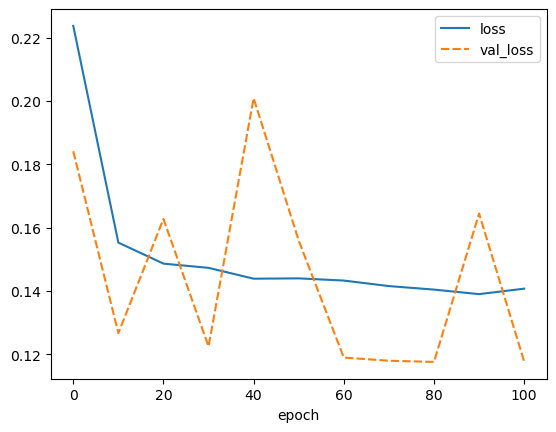

best weights loaded


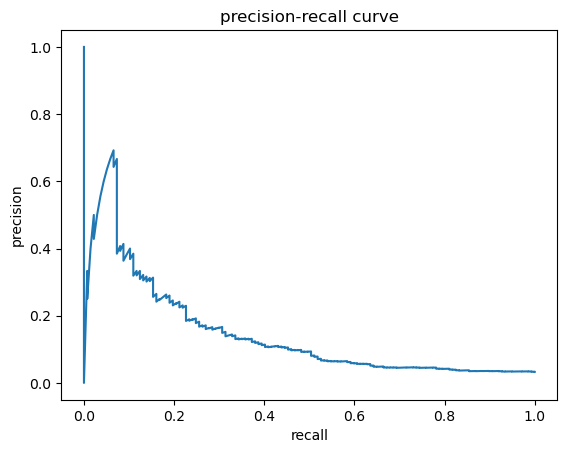

elapsed time: 337.4056169986725
run: 111
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222951F29D0>, <torch.utils.data.dataset.Subset object at 0x00000223901F67F0>, <torch.utils.data.dataset.Subset object at 0x00000223901F6E50>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68865
Epoch 0 | Train Loss 0.22292151911692185 | Validation Loss 0.2028770625591278 | Validation accuracy 0.9500434027777779
Epoch 10 | Train Loss 0.15006472486438174 | Validation Loss 0.12555948719382287 | Validation accura

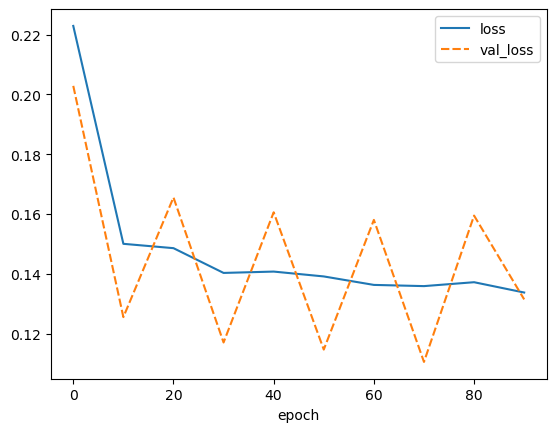

best weights loaded


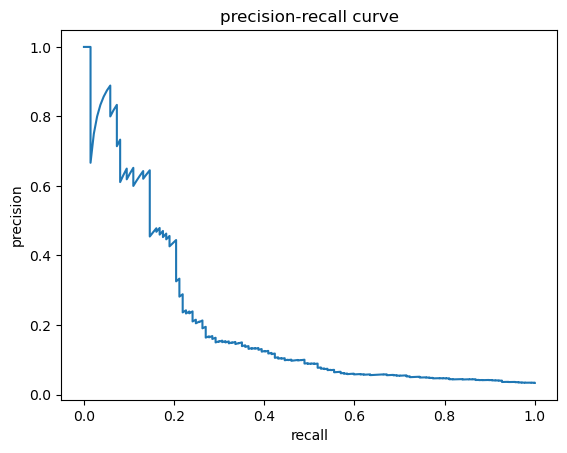

elapsed time: 246.86459517478943
run: 112
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228FA61E80>, <torch.utils.data.dataset.Subset object at 0x0000022375D04A60>, <torch.utils.data.dataset.Subset object at 0x0000022375D02040>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.20963002741336823 | Validation Loss 0.16811995804309846 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.15017132619113632 | Validation Loss 0.12734802514314653 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.149382983644

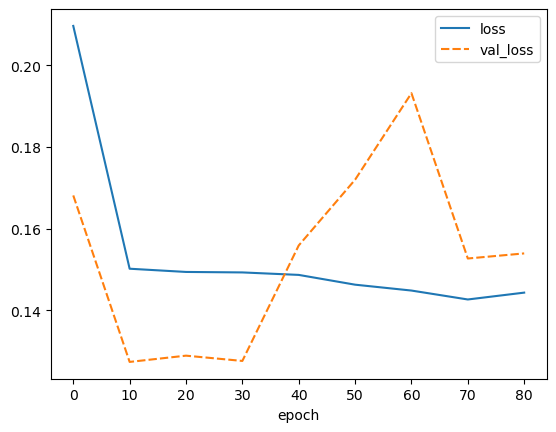

best weights loaded


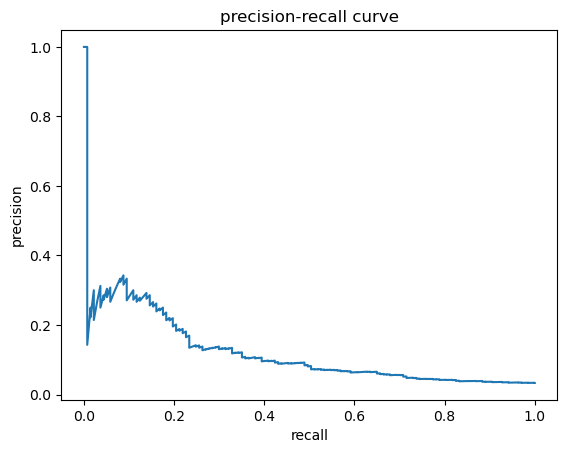

elapsed time: 231.78832054138184
run: 113
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228F88E700>, <torch.utils.data.dataset.Subset object at 0x0000022388BD1B80>, <torch.utils.data.dataset.Subset object at 0x0000022388BD16A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.1931310458616777 | Validation Loss 0.1441410645842552 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14619157203670705 | Validation Loss 0.12395762689411641 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14543793666543384 | Valid

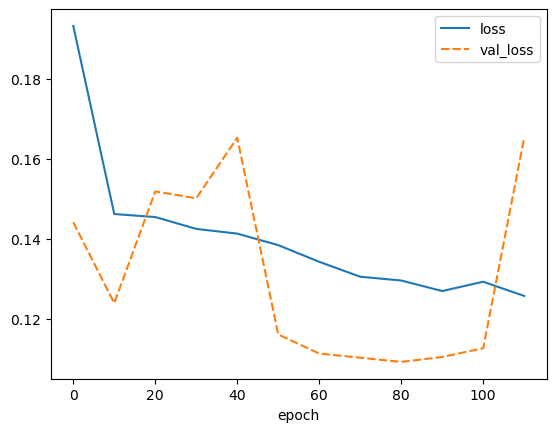

best weights loaded


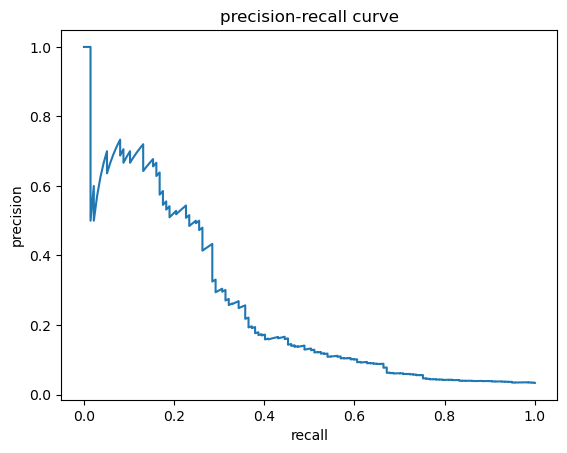

elapsed time: 321.1043601036072
run: 114
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022295746F70>, <torch.utils.data.dataset.Subset object at 0x0000022388B29D90>, <torch.utils.data.dataset.Subset object at 0x0000022388B30310>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134657
Epoch 0 | Train Loss 0.19444246951377753 | Validation Loss 0.13145494535565377 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14642795039848847 | Validation Loss 0.19153456687927245 | Validation accuracy

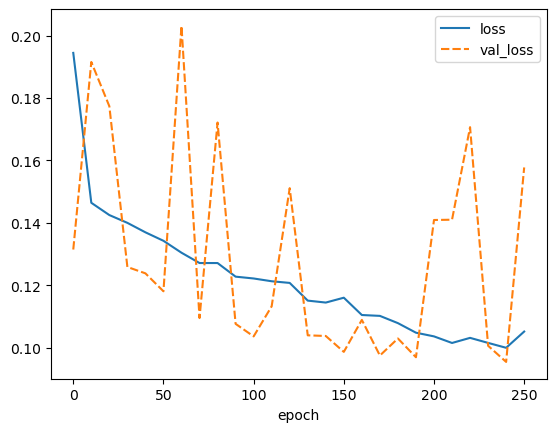

best weights loaded


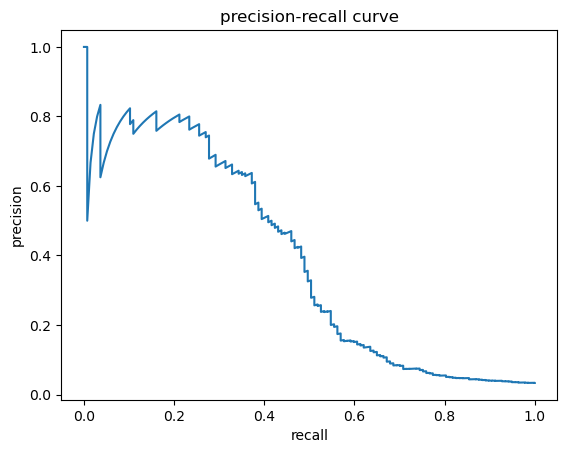

elapsed time: 755.1357672214508
run: 115
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222E4BD5FA0>, <torch.utils.data.dataset.Subset object at 0x0000022372CF8CA0>, <torch.utils.data.dataset.Subset object at 0x00000223902451F0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.20010084094423236 | Validation Loss 0.13267460837960243 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14983521582502307 | Validation Loss 0.12823769673705102 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.1527359056653398

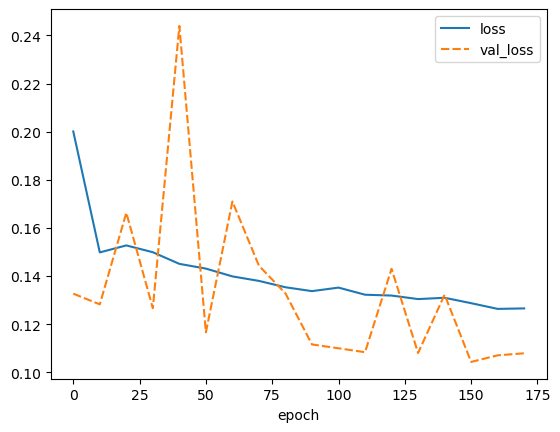

best weights loaded


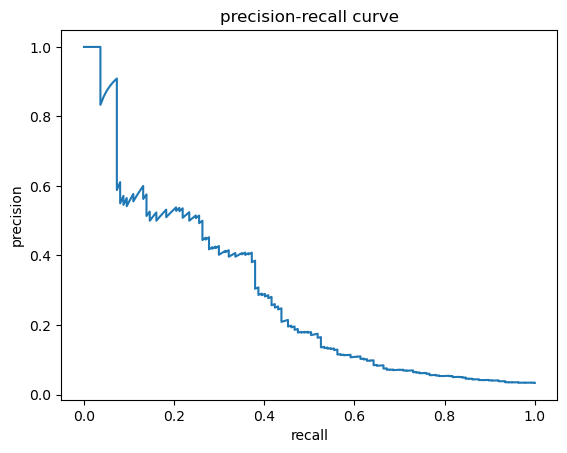

elapsed time: 498.9313232898712
run: 116
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222956BB8E0>, <torch.utils.data.dataset.Subset object at 0x0000022390245760>, <torch.utils.data.dataset.Subset object at 0x0000022390245520>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.20151051404801282 | Validation Loss 0.1337282493710518 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14945599843155255 | Validation Loss 0.1632847636938095 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.144839026

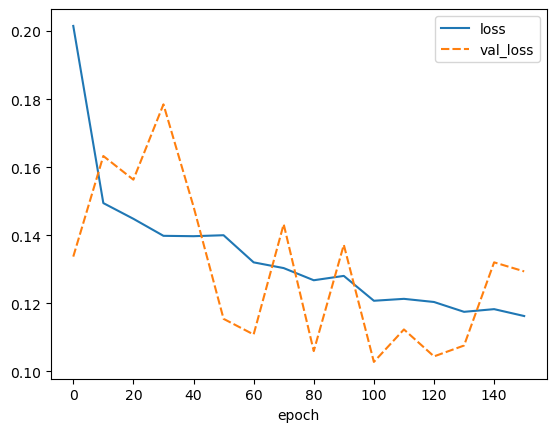

best weights loaded


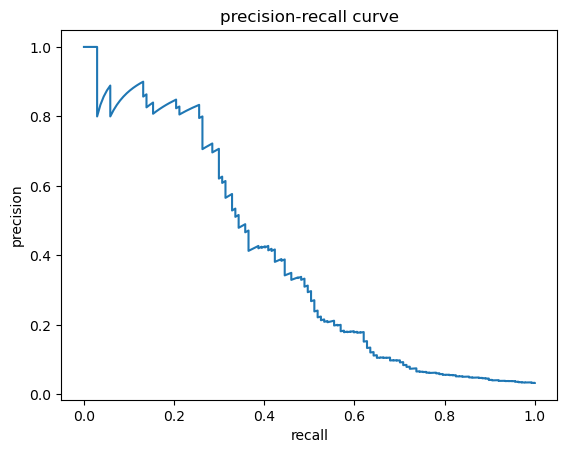

elapsed time: 447.82818484306335
run: 117
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228DE4C880>, <torch.utils.data.dataset.Subset object at 0x0000022388B302E0>, <torch.utils.data.dataset.Subset object at 0x0000022388B304C0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200449
Epoch 0 | Train Loss 0.21243550470381073 | Validation Loss 0.13014442920684816 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14599259581529733 | Validation Loss 0.12464694604277611 | Validation accurac

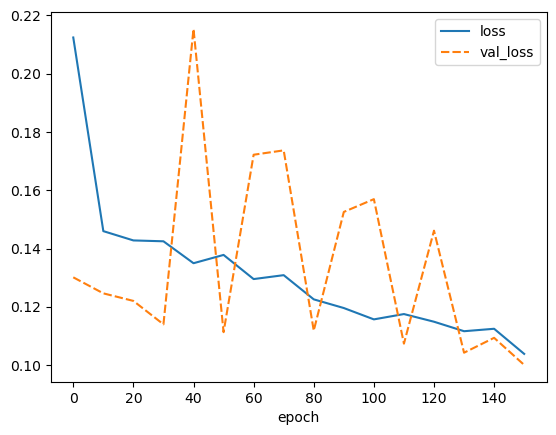

best weights loaded


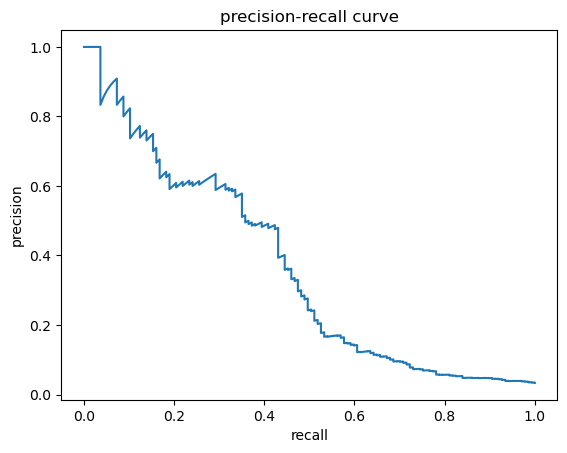

elapsed time: 498.451212644577
run: 118
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291B446D0>, <torch.utils.data.dataset.Subset object at 0x000002239025D0D0>, <torch.utils.data.dataset.Subset object at 0x000002239025D5E0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.1972195440621087 | Validation Loss 0.12992830462753774 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1490188663204511 | Validation Loss 0.2066689521074295 | Validation accuracy 0.9500434027777779
Epoch 20 | Train Loss 0.1471832405

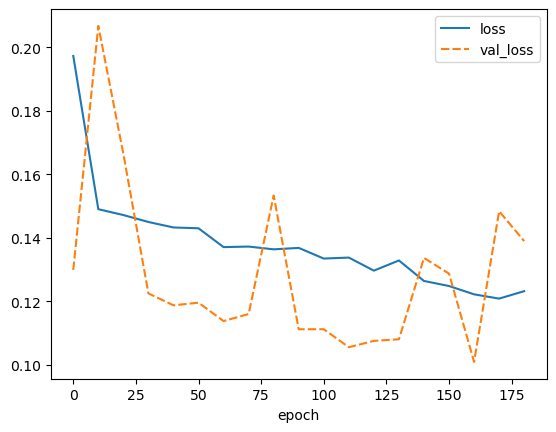

best weights loaded


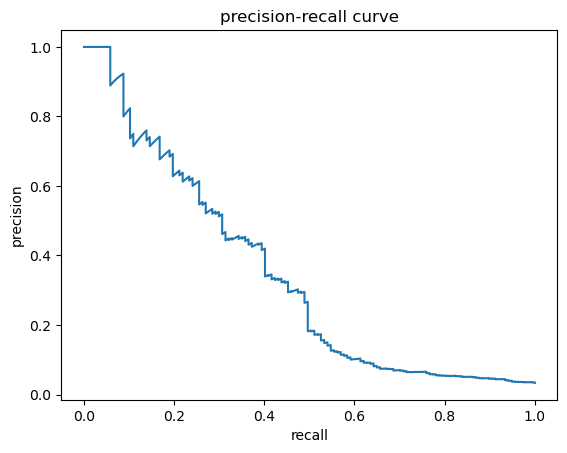

elapsed time: 570.3134505748749
run: 119
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022296E6F2B0>, <torch.utils.data.dataset.Subset object at 0x0000022291B44B50>, <torch.utils.data.dataset.Subset object at 0x000002239025D8E0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.19764954709645474 | Validation Loss 0.1657012790441513 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.14654851591948306 | Validation Loss 0.12159421890974045 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14488982

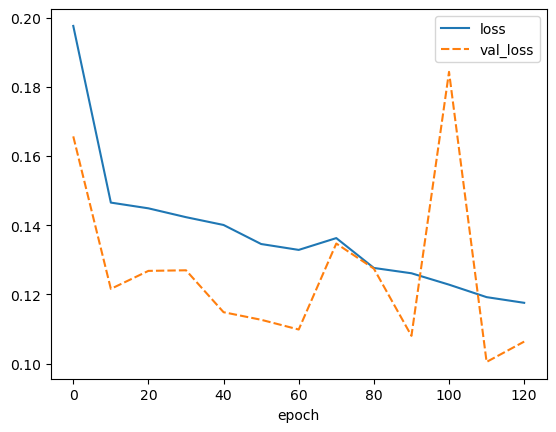

best weights loaded


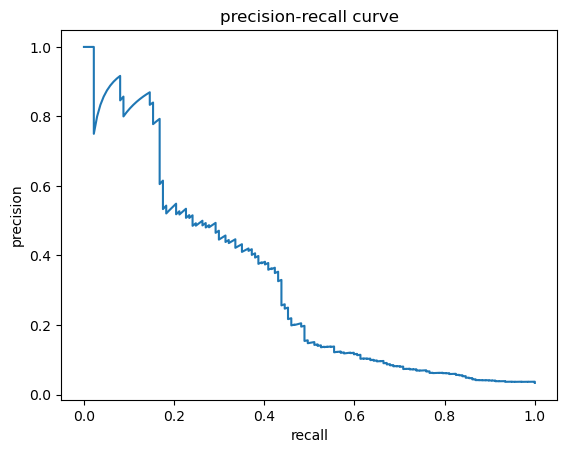

elapsed time: 410.7651765346527
run: 120
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022291C8FC40>, <torch.utils.data.dataset.Subset object at 0x0000022291B44E80>, <torch.utils.data.dataset.Subset object at 0x0000022291B445E0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  6145
Epoch 0 | Train Loss 0.21518437112822678 | Validation Loss 0.22399176955223082 | Validation accuracy 0.9500434027777779
Epoch 10 | Train Loss 0.1491782030824459 | Validation Loss 0.12675267159938813 | Validation accuracy 0.971875
Epoch 20 | Train L

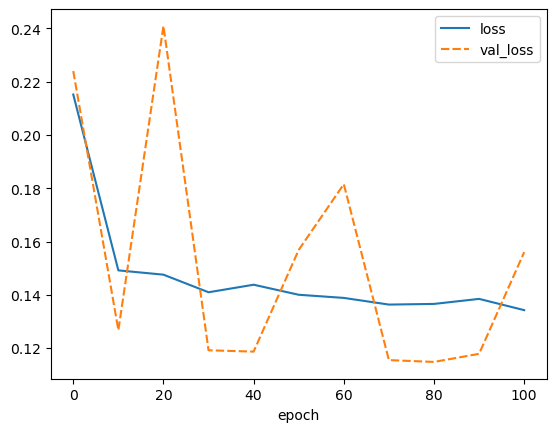

best weights loaded


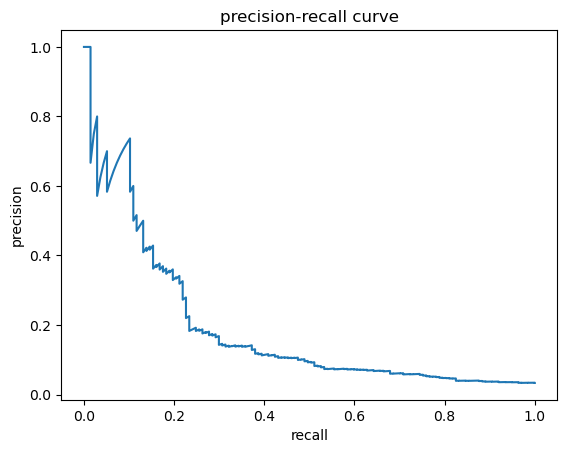

elapsed time: 294.0326099395752
run: 121
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022296AC5C40>, <torch.utils.data.dataset.Subset object at 0x0000022296E6F0A0>, <torch.utils.data.dataset.Subset object at 0x0000022296E6FD60>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.21307983655821194 | Validation Loss 0.13212695419788362 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1509141210805286 | Validation Loss 0.12869322374463082 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15170676419229218 | Validation Loss 0.16061801016330718

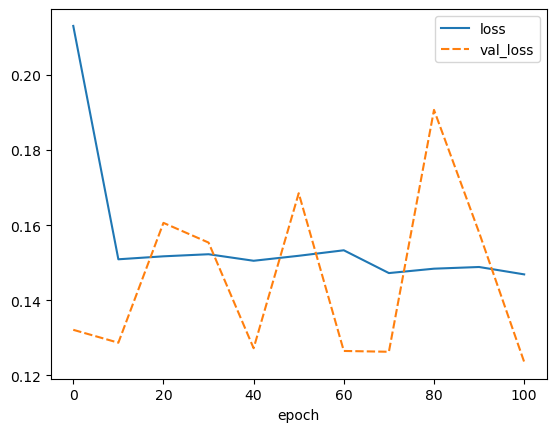

best weights loaded


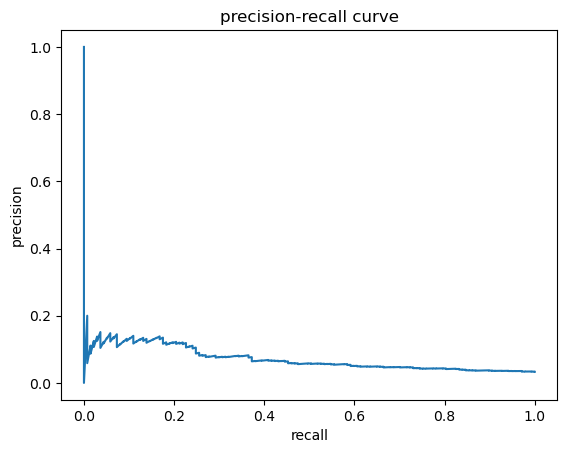

elapsed time: 283.48094296455383
run: 122
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022293508430>, <torch.utils.data.dataset.Subset object at 0x00000222B0E3A310>, <torch.utils.data.dataset.Subset object at 0x00000222B0E3A820>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.21560420682936005 | Validation Loss 0.1393201071768999 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14888230440291492 | Validation Loss 0.1262734055519104 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14756490177277362 | Validation Loss 0.12380080968141556 

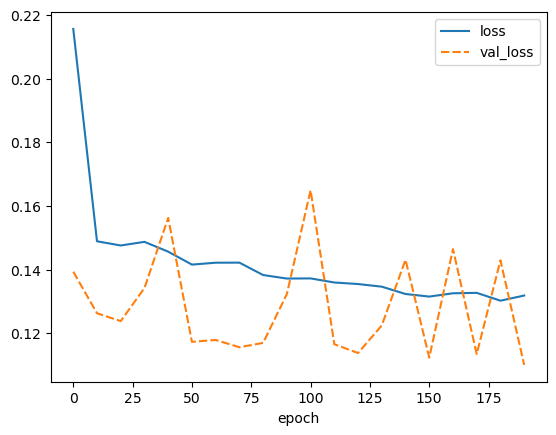

best weights loaded


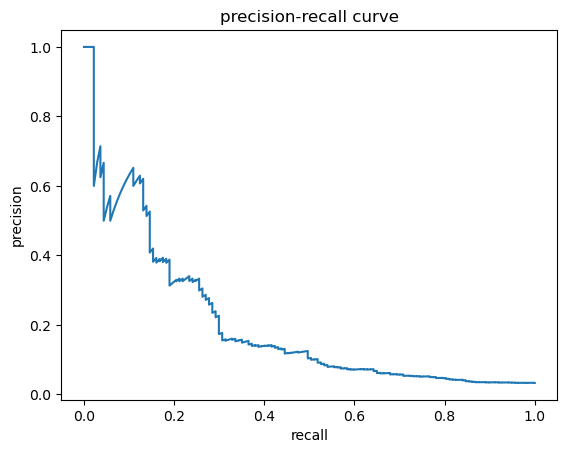

elapsed time: 514.0976312160492
run: 123
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222953514F0>, <torch.utils.data.dataset.Subset object at 0x00000222B0E1B0A0>, <torch.utils.data.dataset.Subset object at 0x00000222B0E1B5B0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268801
Epoch 0 | Train Loss 0.1933330956733588 | Validation Loss 0.1730383038520813 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.14724480699409137 | Validation Loss 0.1459684044122696 | Validation accuracy 

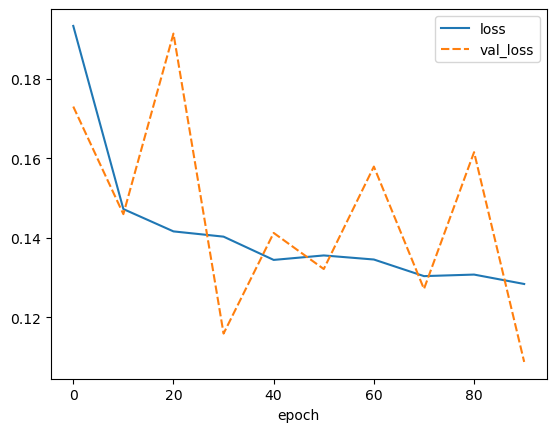

best weights loaded


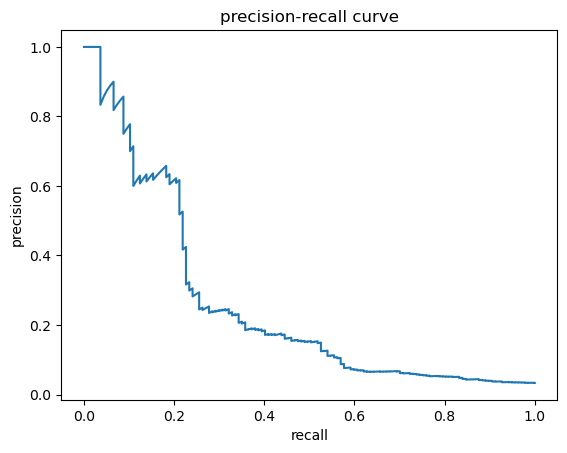

elapsed time: 316.7516579627991
run: 124
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022297297250>, <torch.utils.data.dataset.Subset object at 0x000002228E5D5AF0>, <torch.utils.data.dataset.Subset object at 0x000002228E5D5CA0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.19738213018034445 | Validation Loss 0.17088717520236968 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1519049076419888 | Validation Loss 0.1277489647269249 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14929154989394275

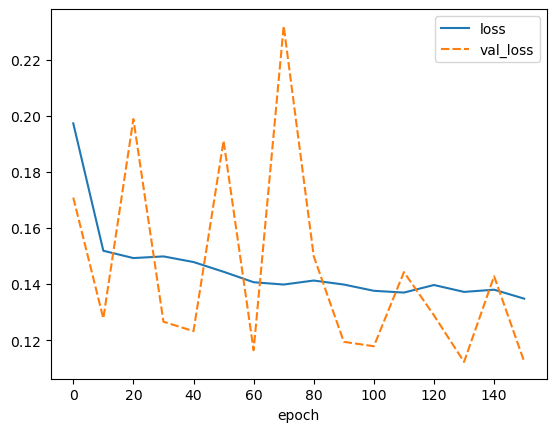

best weights loaded


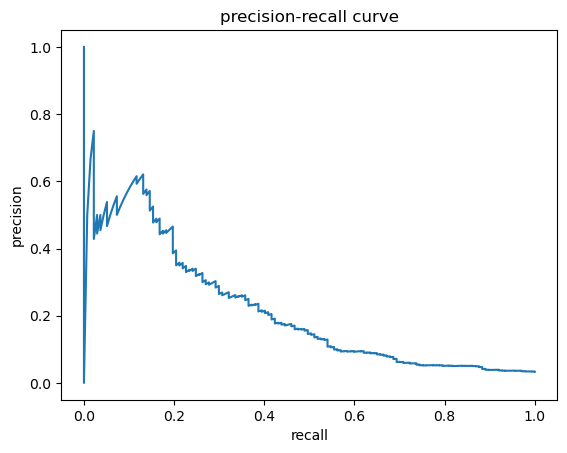

elapsed time: 494.33954977989197
run: 125
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229522B190>, <torch.utils.data.dataset.Subset object at 0x000002228E5D5370>, <torch.utils.data.dataset.Subset object at 0x000002228E5D55E0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.19770189487572873 | Validation Loss 0.1385185904800892 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14936548764958527 | Validation Loss 0.12458972185850144 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14709379095019717 | Valida

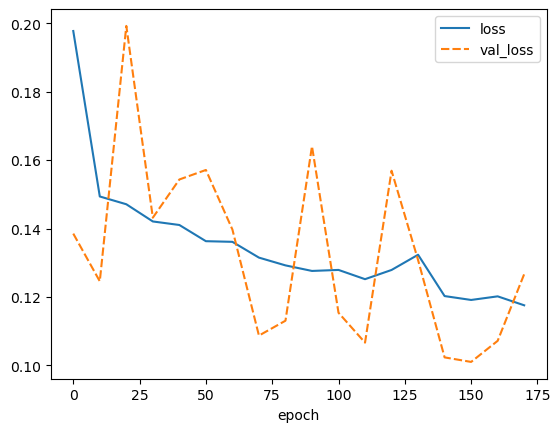

best weights loaded


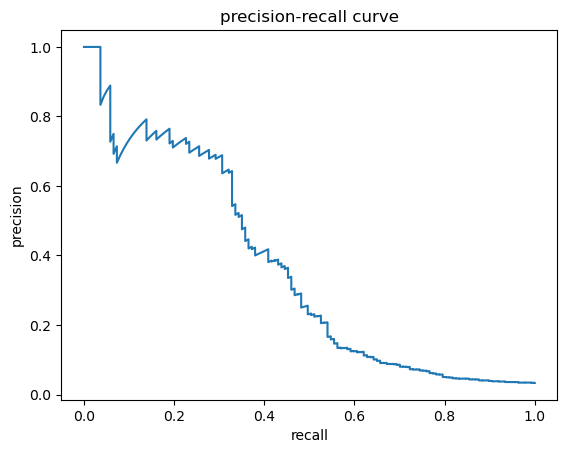

elapsed time: 603.305210351944
run: 126
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022298615B80>, <torch.utils.data.dataset.Subset object at 0x0000022390216070>, <torch.utils.data.dataset.Subset object at 0x00000223902163A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  531457
Epoch 0 | Train Loss 0.19322779368270526 | Validation Loss 0.19605036377906798 | Validation accuracy 0.9500434027777779
Epoch 10 | Train Loss 0.14744888923384927 | Validation Loss 0.19562698900699615 | Validation a

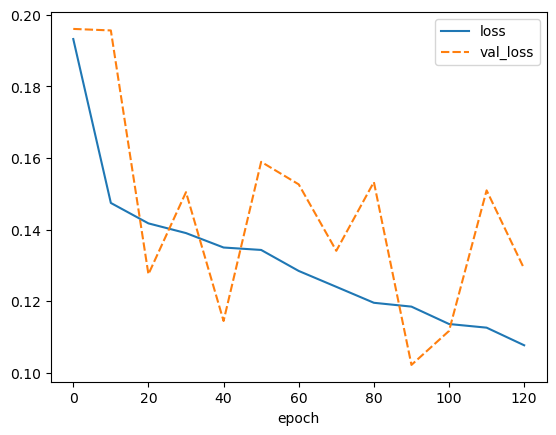

best weights loaded


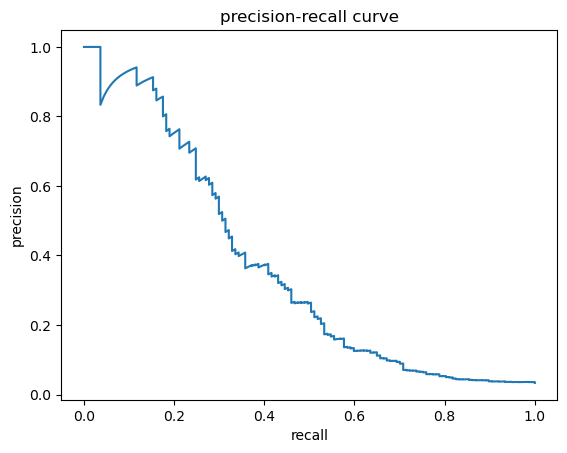

elapsed time: 490.6802067756653
run: 127
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222989222E0>, <torch.utils.data.dataset.Subset object at 0x000002239023C8B0>, <torch.utils.data.dataset.Subset object at 0x000002239023C370>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.18998283938024985 | Validation Loss 0.13010243214666845 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15323467778437067 | Validation Loss 0.16941733956336974 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.148600568

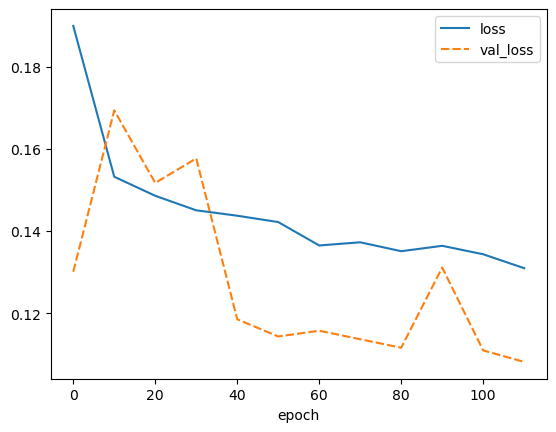

best weights loaded


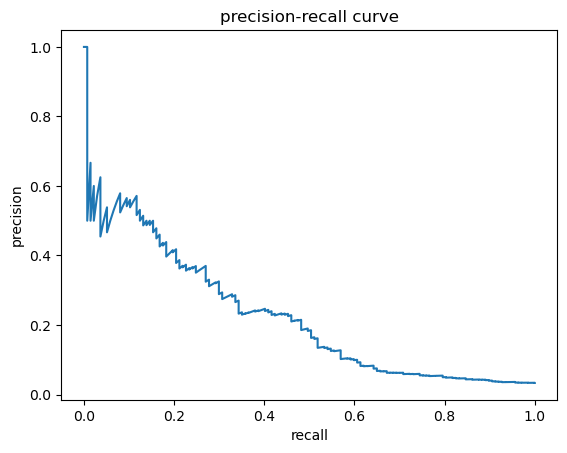

elapsed time: 440.19377088546753
run: 128
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229737EE20>, <torch.utils.data.dataset.Subset object at 0x000002239023CBB0>, <torch.utils.data.dataset.Subset object at 0x000002239023CF10>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.19660668978185364 | Validation Loss 0.13219304382801056 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14632333521590088 | Validation Loss 0.12230056673288345 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14359482648697766 |

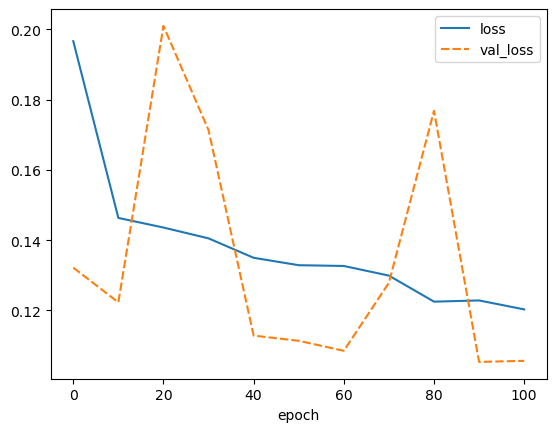

best weights loaded


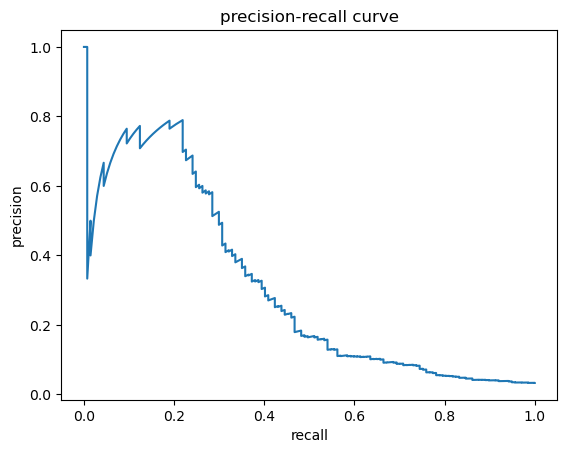

elapsed time: 402.2403128147125
run: 129
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E4591F0>, <torch.utils.data.dataset.Subset object at 0x000002239023C640>, <torch.utils.data.dataset.Subset object at 0x000002239023CB20>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  794113
Epoch 0 | Train Loss 0.1944528730078177 | Validation Loss 0.12977434769272805 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15182156905983435 | Validation Loss 0.14915826320648193 | Validation accuracy 0.

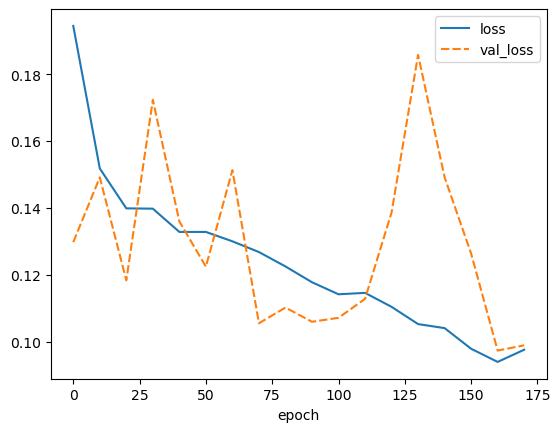

best weights loaded


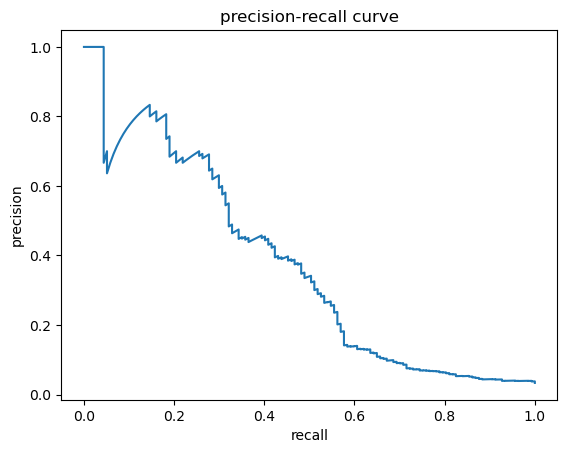

elapsed time: 798.8587760925293
run: 130
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228E459700>, <torch.utils.data.dataset.Subset object at 0x00000223901C54F0>, <torch.utils.data.dataset.Subset object at 0x00000223901C5A00>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.19107877350214755 | Validation Loss 0.12969307936728 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1530955456423037 | Validation Loss 0.1644788920879364 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.14933800742481

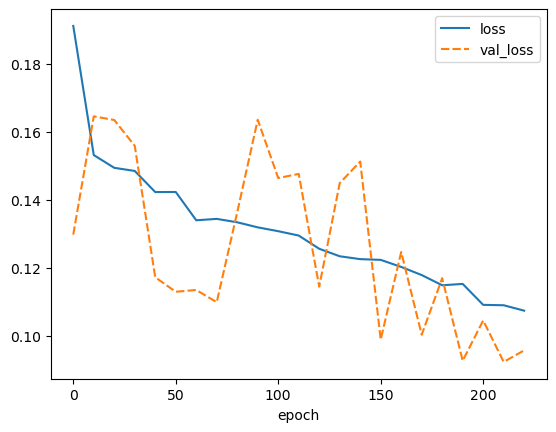

best weights loaded


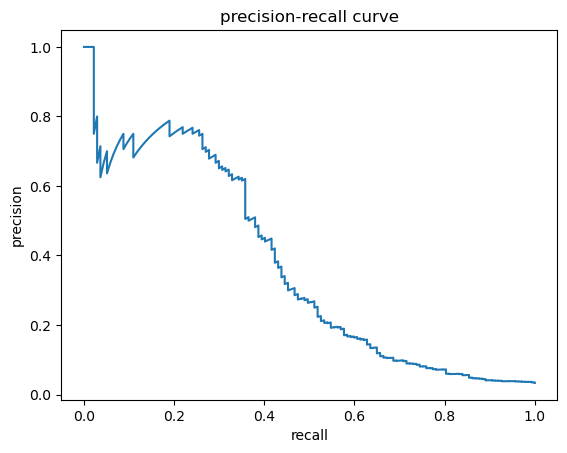

elapsed time: 953.9752571582794
run: 131
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022298C74850>, <torch.utils.data.dataset.Subset object at 0x00000223901C5E20>, <torch.utils.data.dataset.Subset object at 0x00000223901C5070>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.19501826031641525 | Validation Loss 0.12990622445940972 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1512284136631272 | Validation Loss 0.12470610216259956 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14360026315306174 | V

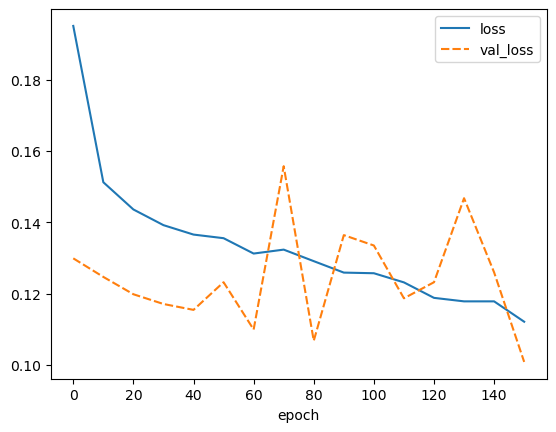

best weights loaded


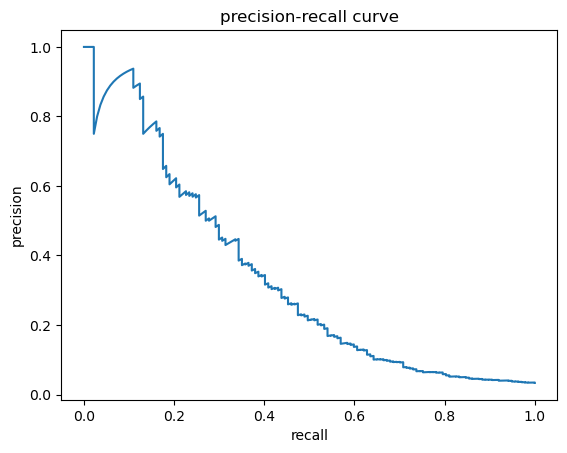

elapsed time: 671.7718770503998
run: 132
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002228DEBD5E0>, <torch.utils.data.dataset.Subset object at 0x00000222B0E3A340>, <torch.utils.data.dataset.Subset object at 0x0000022388C2CFA0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  6145
Epoch 0 | Train Loss 0.20665867807287158 | Validation Loss 0.13416360579431058 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14944810194499564 | Validation Loss 0.16411482095718383 | Validation accuracy 0.9609592013888889
Epoch 20 | Tra

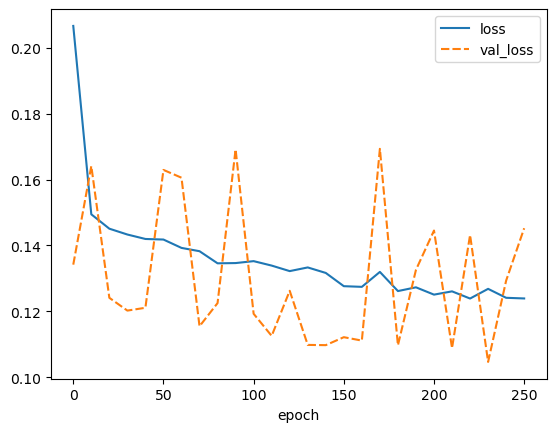

best weights loaded


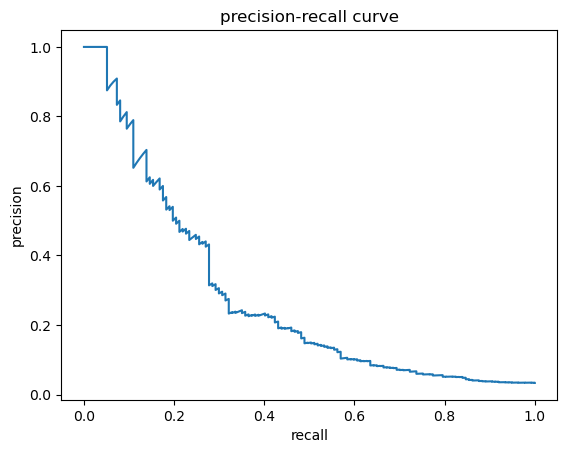

elapsed time: 660.6370515823364
run: 133
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022296AA90A0>, <torch.utils.data.dataset.Subset object at 0x00000222952710A0>, <torch.utils.data.dataset.Subset object at 0x0000022295271520>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.23247278233369192 | Validation Loss 0.1755551964044571 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1521675306739229 | Validation Loss 0.16451113820075988 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.14927408212062085 | Validation Lo

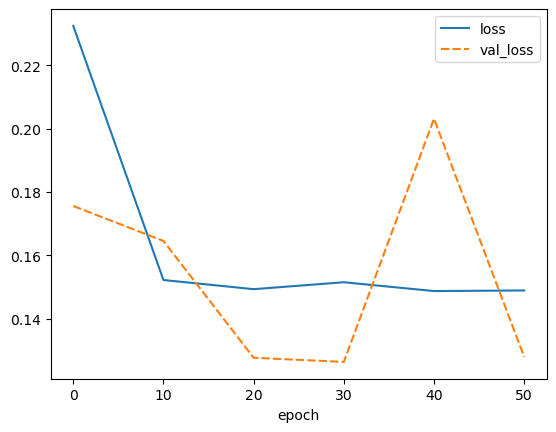

best weights loaded


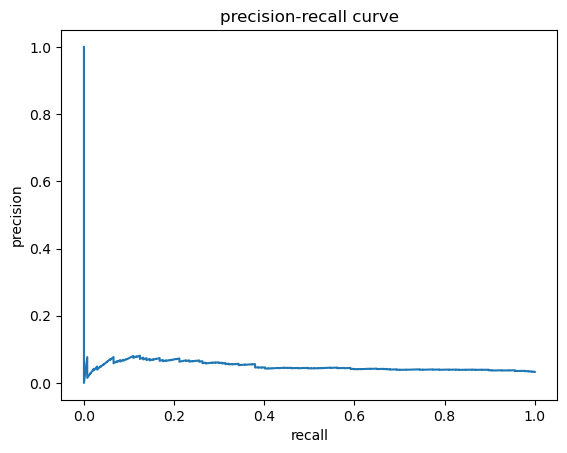

elapsed time: 140.39100074768066
run: 134
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229564C8E0>, <torch.utils.data.dataset.Subset object at 0x0000022295271610>, <torch.utils.data.dataset.Subset object at 0x00000223799293D0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.22068286980643417 | Validation Loss 0.13968128189444542 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14865988763895902 | Validation Loss 0.1259200431406498 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14711664413863962 | Validation Loss 0.12334911674261

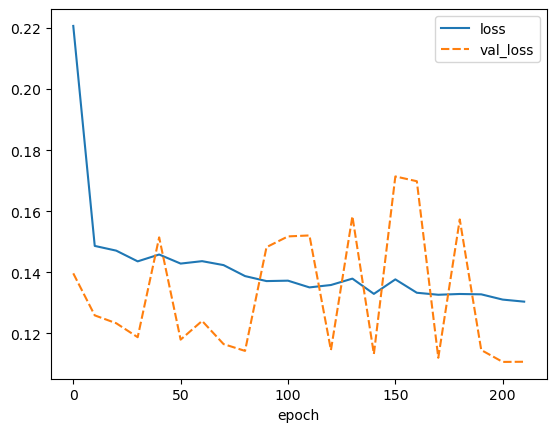

best weights loaded


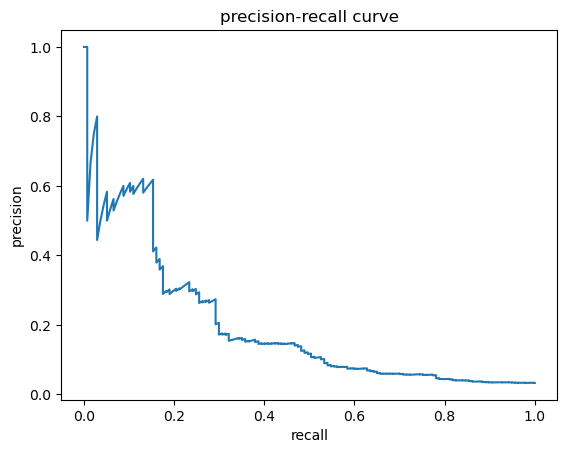

elapsed time: 565.7014615535736
run: 135
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022296EE2D30>, <torch.utils.data.dataset.Subset object at 0x00000222E50EA3A0>, <torch.utils.data.dataset.Subset object at 0x00000222E50EA6A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268801
Epoch 0 | Train Loss 0.19118165608608362 | Validation Loss 0.13196221739053726 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14934283359484238 | Validation Loss 0.1260113425552845 | Validation accuracy 0.971

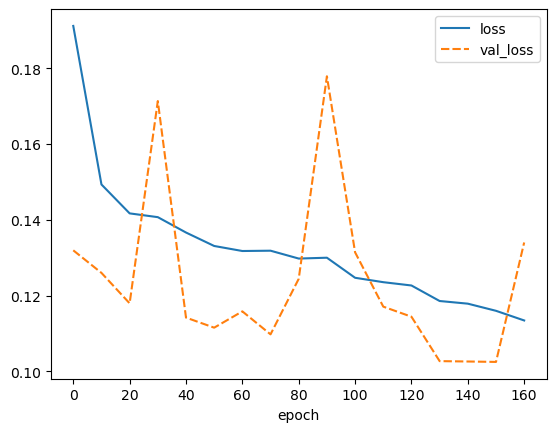

best weights loaded


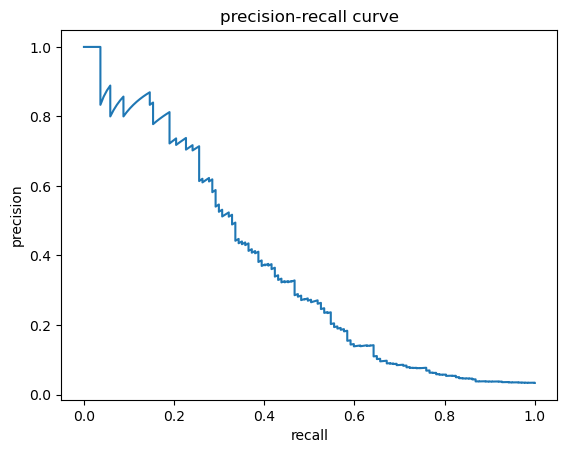

elapsed time: 566.9760391712189
run: 136
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229157CE20>, <torch.utils.data.dataset.Subset object at 0x00000222E50EA7C0>, <torch.utils.data.dataset.Subset object at 0x0000022296BF9C10>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.1905341943105062 | Validation Loss 0.13656473830342292 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15244115008549255 | Validation Loss 0.16312675178050995 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.1491056840979

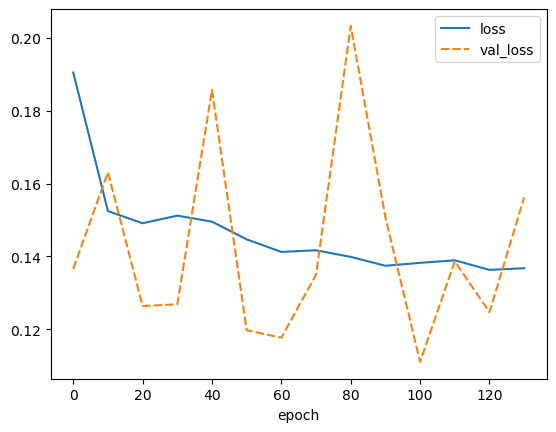

best weights loaded


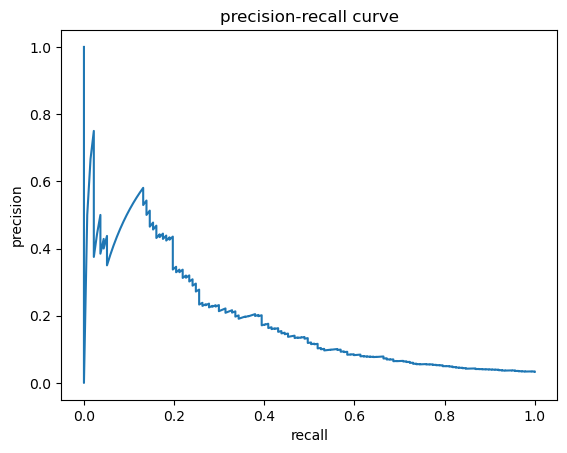

elapsed time: 432.3065514564514
run: 137
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222D4496D00>, <torch.utils.data.dataset.Subset object at 0x000002239030D6A0>, <torch.utils.data.dataset.Subset object at 0x000002239030DBB0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.20868777732054392 | Validation Loss 0.1402312159538269 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15139427848837592 | Validation Loss 0.12574145197868347 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.14536797390742737 | Vali

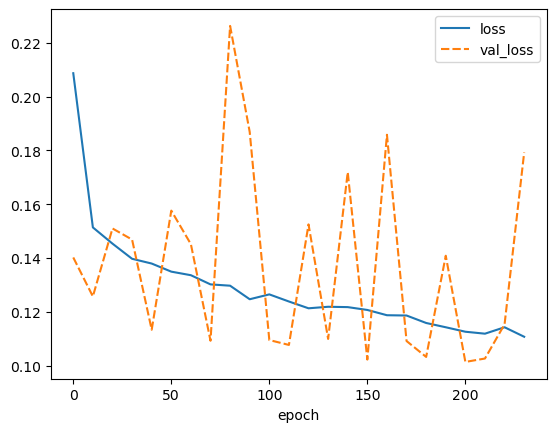

best weights loaded


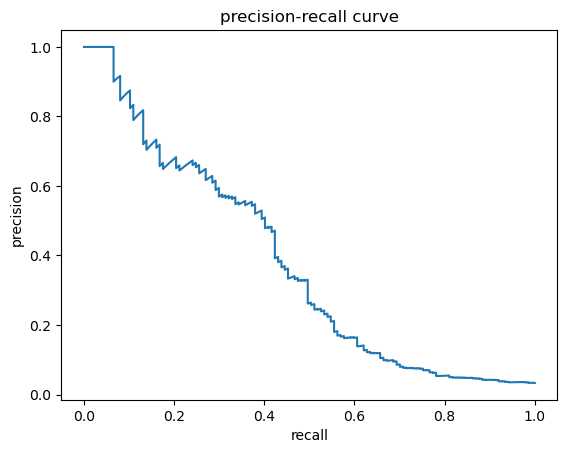

elapsed time: 801.0224916934967
run: 138
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022296B62130>, <torch.utils.data.dataset.Subset object at 0x000002239030D610>, <torch.utils.data.dataset.Subset object at 0x0000022388C07070>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  531457
Epoch 0 | Train Loss 0.1981068759253531 | Validation Loss 0.13390290215611458 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14621538894646097 | Validation Loss 0.1210144642740488 | Validation accuracy 

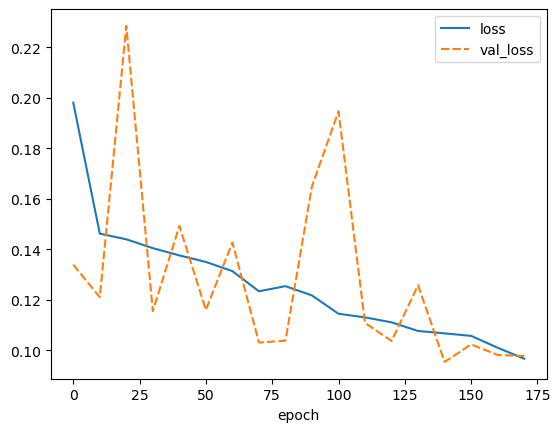

best weights loaded


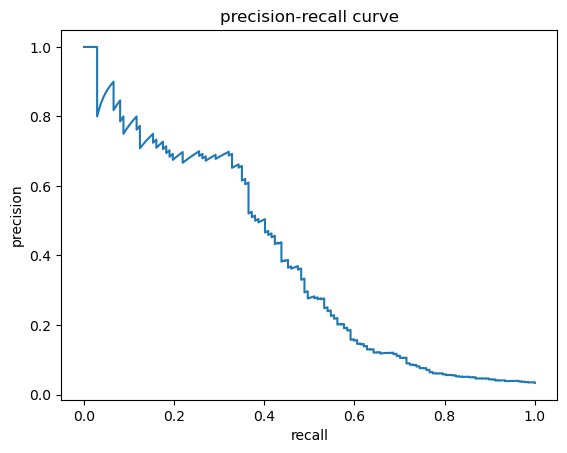

elapsed time: 683.0337083339691
run: 139
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229AAC31F0>, <torch.utils.data.dataset.Subset object at 0x00000223902E8B50>, <torch.utils.data.dataset.Subset object at 0x00000223902E8340>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.1901537746642575 | Validation Loss 0.1309963084757328 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.15224013567873926 | Validation Loss 0.15332438051700592 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.14897970

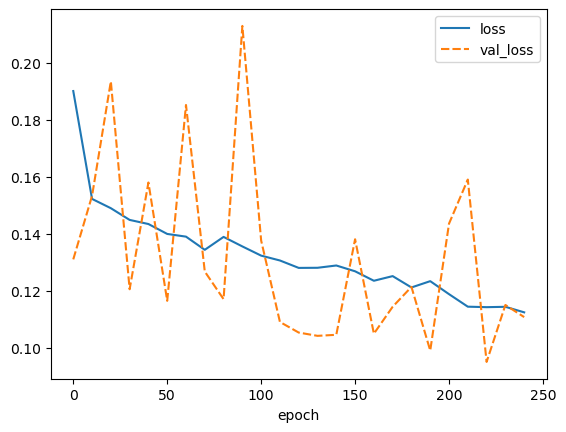

best weights loaded


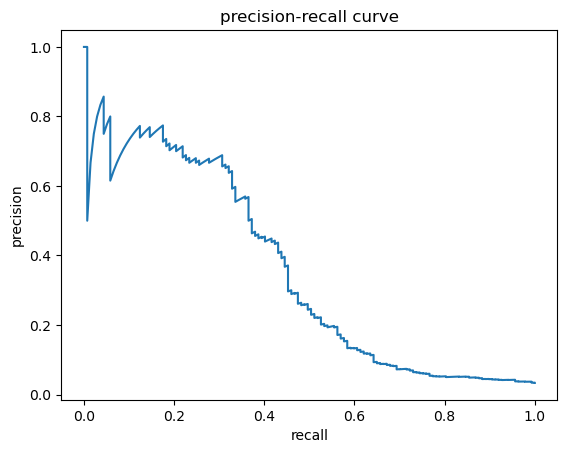

elapsed time: 868.837968826294
run: 140
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022296E81940>, <torch.utils.data.dataset.Subset object at 0x0000022388C07880>, <torch.utils.data.dataset.Subset object at 0x0000022388C07760>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.1872690333561464 | Validation Loss 0.16833836138248442 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.1473459955869299 | Validation Loss 0.1568038284778595 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss 0.1

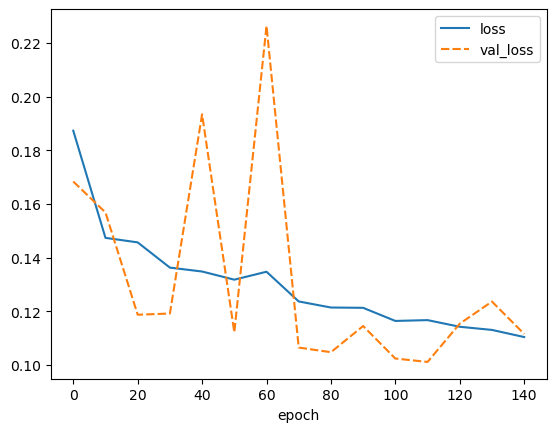

best weights loaded


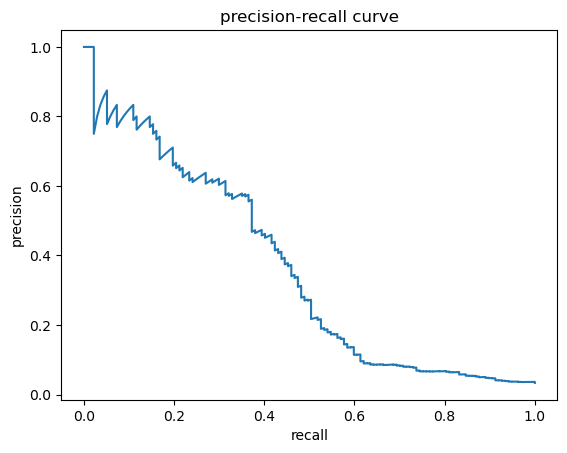

elapsed time: 548.0699136257172
run: 141
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>, <function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222953A4310>, <torch.utils.data.dataset.Subset object at 0x00000223772ABA60>, <torch.utils.data.dataset.Subset object at 0x00000223772A2070>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  794113
Epoch 0 | Train Loss 0.19347919162475702 | Validation Loss 0.13035264164209365 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.14662345137560007 | Validation Loss 0.1525373250246048 | Validation accuracy

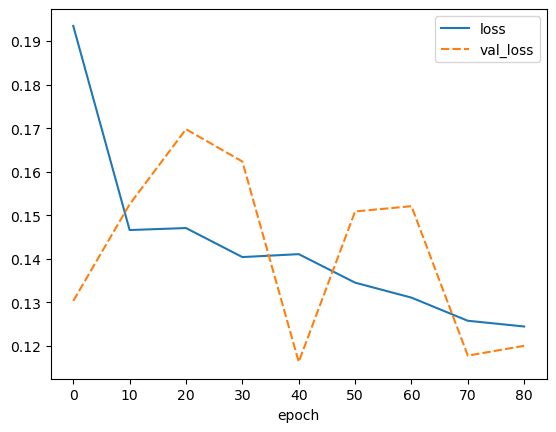

best weights loaded


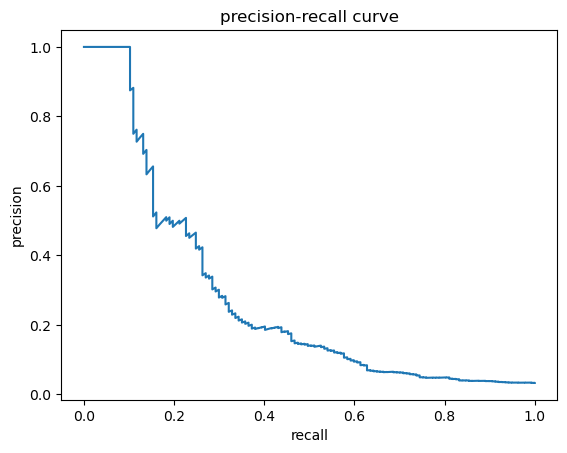

elapsed time: 406.002539396286
run: 142
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x000002228B5B6B80>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000222973FCB50>, <torch.utils.data.dataset.Subset object at 0x00000223772A2280>, <torch.utils.data.dataset.Subset object at 0x00000223772A23A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.18828479606996884 | Validation Loss 0.13035448640584946 | Validation accuracy 0.971875
Epoch 10 | Train Loss 0.1498612691507195 | Validation Loss 0.12593829371035098 | Validation accuracy 0.971875
Epoch 20 | Train Loss 0.15092837291233469 

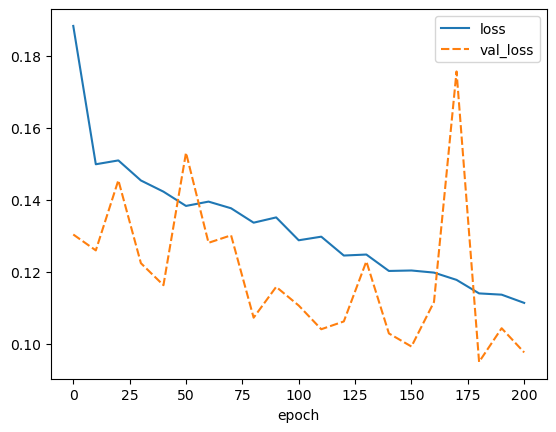

best weights loaded


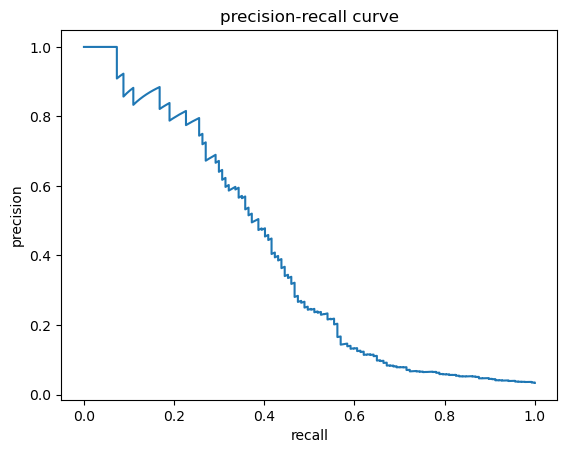

elapsed time: 869.7605972290039
run: 143
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x000002228B5D4550>], 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002229AC98220>, <torch.utils.data.dataset.Subset object at 0x0000022390258A30>, <torch.utils.data.dataset.Subset object at 0x000002229AC70FD0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.19511359546220663 | Validation Loss 0.16734062731266022 | Validation accuracy 0.9609592013888889
Epoch 10 | Train Loss 0.14466068080880426 | Validation Loss 0.16147865653038024 | Validation accuracy 0.9609592013888889
Epoch 20 | Train Loss

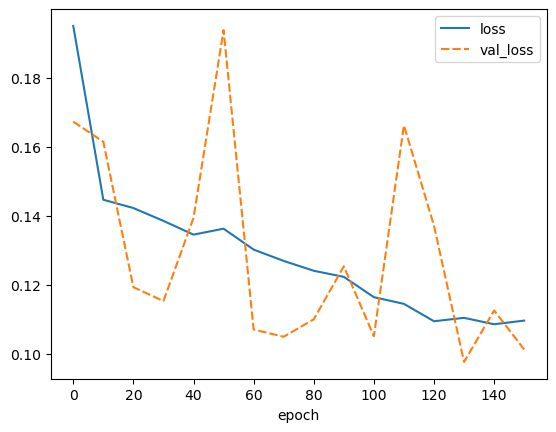

best weights loaded


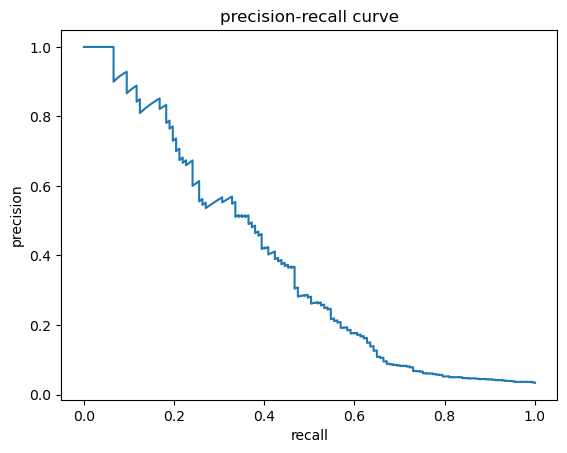

elapsed time: 700.4409518241882


In [12]:
import time
counter = 0
for combination in combinations:
    print(f"run: {counter}")
    t0 = time.time()
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_hiv()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_class_hiv.pkl'
        else: 
            loader_file = 'datasets_class_hiv.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_classification_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_classification_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification_fingerprint(model, test_loader, device, best_model_weights)

    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")

    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #classification
    save_dict["precisions"] = precisions
    save_dict["recalls"] = recalls
    save_dict["thresholds"] = thresholds
    from sklearn.metrics import precision_recall_curve, auc
    save_dict["auc"] = auc(recalls, precisions)

    save_dict["batch_size"] = batch_size

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
        
    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    